# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

#### Поключение библиотеки и первичный осмотр датасета

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
print(data.head(10))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   

#### Осмотр основных параметров датасета

В этом пункте буду рассматриваться размеры датасета, представленные типы данных и просмотр пустых значений

In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
print(data.describe())

       total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445

#### Проверка на наличие явных дубликатов

In [4]:
print(data.duplicated().sum())

0


#### Построение гистограмм

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

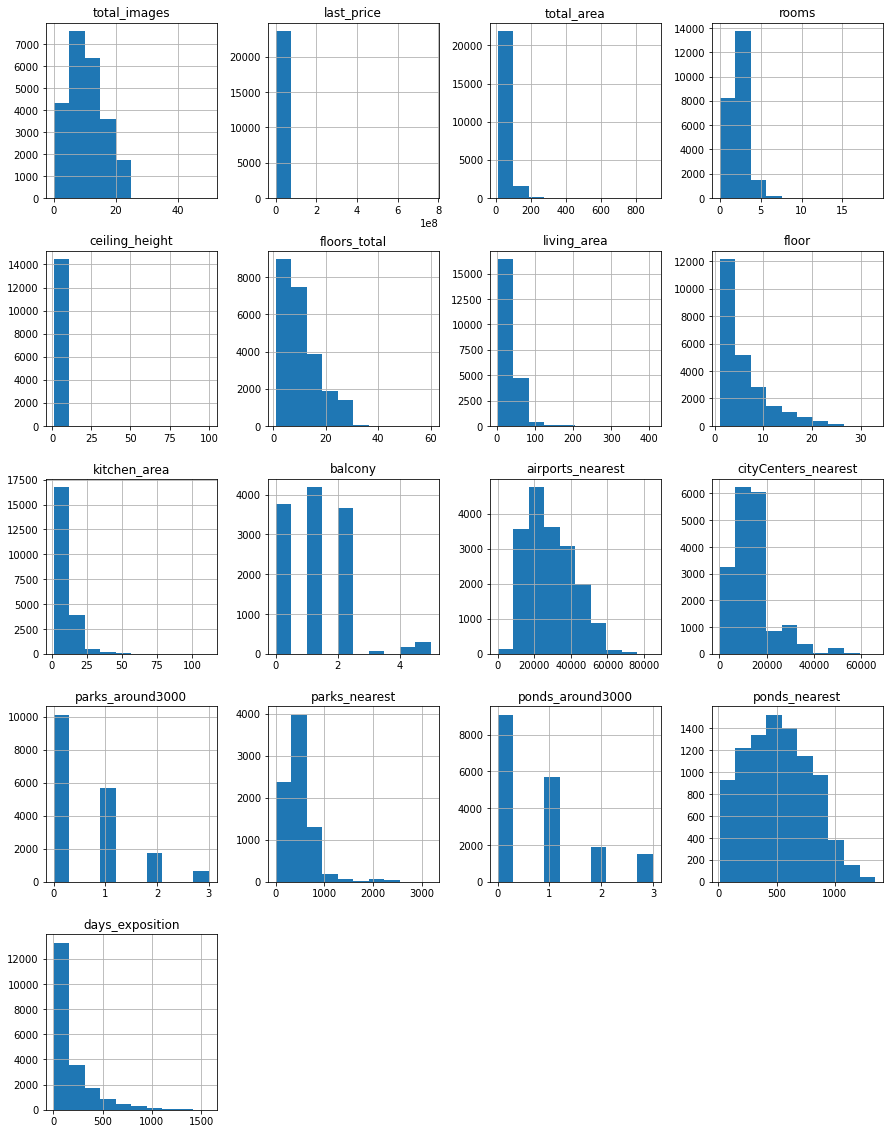

In [5]:
data.hist(figsize=(15, 20))

#### Выводы первичного этапа

Мы посмотрели формат датасета и базовую информацию о нем. Обнаружили, что он состоит из 23699 строк и 22 столбцов. Также первичный анализ выявил, что в данном датасете не наблюдается явных дубликатов, но присутсвует множество пропущенных значений, в следующем разделе мы оценим масштаб пропуска и исправим большинство из них

По гистограммам можно сказать, что в данных есть аномальные или неествественные значения, которые в дальнейшем будут проанализированы. Пример - ceiling_height (высота потолков) содержит выбросы за 10м.

### Выполните предобработку данных

#### Оформление датасета

В рамках данного пункта рассмотрим наименовая столбцов данного датасета

In [6]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

В целом названия данных столбцов можно назвать корректными, но для удобства дальнейшей работы подведем некотрые из них под общий стандарт

In [7]:
data = data.rename(columns={
    "cityCenters_nearest": "city_сenters_nearest",
    "parks_around3000": "parks_around_3000",
    "ponds_around3000": "ponds_around_3000"})

Проверим корректность изменения заголовков 

In [8]:
print(data.head(5))
print(data.columns)

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Проверка данных

В данном пункте рассматриваются столбцы, в которых данные предварительно можно назвать корректными ля дальнейшей их проверки

**А. total_images**


In [10]:
#unique values
print(data['total_images'].unique())

#check empty values
print(data['total_images'].isna().mean())

[20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]
0.0


Можно сделать вывод, что данный столбец находится в рамках естественных значений и не содержит аномалий

**Б. studio**

In [11]:
#unique values
print(data['studio'].unique())

#value counts
print(data['studio'].value_counts())

#check empty
print(data['studio'].isna().mean())

[False  True]
False    23550
True       149
Name: studio, dtype: int64
0.0


Можно сделать вывод, что данный столбец находится в рамках естественных значений и не содержит аномалий

**В. open_plan**

In [12]:
#unique values
print(data['open_plan'].unique())

#value counts
print(data['open_plan'].value_counts())

#check empty
print(data['open_plan'].isna().mean())

[False  True]
False    23632
True        67
Name: open_plan, dtype: int64
0.0


Можно сделать вывод, что данный столбец находится в рамках естественных значений и не содержит аномалий

**Г. floor**

In [13]:
#unique values
print(data['floor'].describe())

#check empty
print(data['floor'].isna().mean())

#check anomaly - this floor > maximum floor in building
print(data[data['floor']>data['floors_total']]['floor'].count())
#or using query: len(data.query('floor>floors_total'))

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64
0.0
0


Можно сделать вывод, что данный столбец находится в рамках естественных значений и не содержит аномалий

**Д. living_area**

In [14]:
#unique values
print(data['living_area'].describe())

#check empty
print(data['living_area'].isna().mean())

#check anomaly
print(len(data.query('living_area > total_area')))

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64
0.08029874678256467
0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Обработка типов данных и значений

В данном пункте мы будем рассматривать корректность заданных типов данных для тех или иных столбцов датасета. В случае необходимости перед измененем типов будем проводить предварительную обработку

Для начала обработки повторно вызовем описание данных в таблице. Затем рассмотрим по отдельности каждый столбец, который содержит некорректный тип данных

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**А. last_price**

В рамках этого столбца корректнее рассматривать числа как тип int а не как float, поскольку в масштабах нескольких миллионов рублей копейки можно принять за допустимую погрешность

In [17]:
data['last_price'] = data['last_price'].astype('int')
print(data['last_price'])

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64


 **Б. first_day_exposition**
 
 
 Для данного столбца логичнее было бы рассматривать значения как тип datetime, а не в строчном формате

Для начала проведем просмотр столбца для отпределения формата времени

In [18]:
print(data['first_day_exposition'].head(10))

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
5    2018-09-10T00:00:00
6    2017-11-02T00:00:00
7    2019-04-18T00:00:00
8    2018-05-23T00:00:00
9    2017-02-26T00:00:00
Name: first_day_exposition, dtype: object


Далее проведем преобразование из строчного в формата в заданный

In [19]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

#check
print(data['first_day_exposition'].head(10))

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
5   2018-09-10
6   2017-11-02
7   2019-04-18
8   2018-05-23
9   2017-02-26
Name: first_day_exposition, dtype: datetime64[ns]


**В. floors_total**

Для данного столбца логичнее рассматривать занчения как целые числа, поскольку дробного числа этажей быть не может (мансарда и цокольный не в счет - авторская шутка)

Как мы можем обнаружить, в данный момент преобразование типов из-за присутсвия пустых значений невозможно. Проверим природу этих пустых значений, заполним их и преобразуем тип

Первичная гипотеза - этажи не указаны в частных или одноэтажных домах. Проверим ее

In [20]:
data[data['floors_total'].isna() == True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000,65.2,2018-10-02,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033,28.1,2016-11-23,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348,70.8,2015-08-01,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191,93.6,2017-04-06,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000,39.0,2017-04-22,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,63.5,2017-05-24,2,2.8,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160,64.5,2017-04-02,2,NaN,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263,110.4,2016-11-20,3,NaN,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872,123.3,2017-04-25,3,NaN,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Предварительная гипотеза была опровергнута, так как в одноэтажных или частных домах не могут встретиться квартиры на 4 или 12 этажах

В данном случае стоит оценить масштаб потери данных в случае удаления строк с неуказанным количеством этажей. Возможно рациональнее будет проигнорировать эти данные

In [21]:
data['floors_total'].isna().mean()

0.0036288450989493226

В данном случае доля составляет 0,36% от всей таблицы, что обозначает малое влияние на общую выборку данных. Можно убрать эти данные

In [22]:
data.dropna(subset=['floors_total'], inplace=True)
data = data.reset_index(drop=True)

#check
data['floors_total'].isna().mean()

0.0

Теперь можно преобразовать тип данных для данного столбца

In [23]:
data['floors_total'] = data['floors_total'].astype('int')
print(data['floors_total'])

0        16
1        11
2         5
3        14
4        14
         ..
23608     5
23609     5
23610     3
23611    17
23612     5
Name: floors_total, Length: 23613, dtype: int64


**Г. is_apartment**

Данный столбец необходимо привести к типу bool, поскольку из себя он представляет категоральное значение

По примеру предыдущего пункта, проверим, нет ли изначально в столбце пропусков

In [24]:
#Part of NA in dataset if exist
print(data['is_apartment'].isna().mean())


data['is_apartment'].value_counts()

0.8824799898361072


False    2725
True       50
Name: is_apartment, dtype: int64

Мы обнаружили, что в этом столбце также присутствуют пустые значения, которые составляют аж 88% от всего столбца, мы не можем их удалить, но обязаны обработать. Так как апартаменты - понятие характеризующее жилую недвижимость недоступную для проживания, примем, что апартаментов в данном датасете будет очень немного. Тогда заменим все NA на False

In [25]:
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data['is_apartment'])

0        False
1        False
2        False
3        False
4        False
         ...  
23608    False
23609    False
23610    False
23611    False
23612    False
Name: is_apartment, Length: 23613, dtype: bool


**Д. balcony**

В данном пункте мы учтем, что столбец содержит количество балконов на один лот недвижимости. Проверим это предположение и, если оно подтвердится, заменим типы на целочисленный

In [26]:
data['balcony'].describe()

count    12133.000000
mean         1.154208
std          1.071022
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

Перед заменой проверим столбец на пустые значения и подумаем над их природой

In [27]:
data['balcony'].isna().mean()

0.48617287087621225

Мы получили, что информация о балконах не указана для 48% квартир. Это может быть связано с тем, что при вводе данных стоит что-то вроде "если в вашей квартире нет балкона, оставьте это поле пустым" или с тем, что при автоматичсеком подтягивании сос торнних сервисов, алгоритм не нашел информацию о балконе. В таком случае можно заполнять пропуски 0

In [28]:
data['balcony'] = data['balcony'].fillna(0)
print(data['balcony'].describe())

#check
print(data['balcony'].isna().mean())

count    23613.000000
mean         0.593063
std          0.960307
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64
0.0


In [29]:
data['balcony'] = data['balcony'].astype('int')

# check
data['balcony']

0        0
1        2
2        0
3        0
4        0
        ..
23608    0
23609    0
23610    0
23611    2
23612    0
Name: balcony, Length: 23613, dtype: int64

**Е. parks_around_3000**

В данном столбце рационально рассматривать количество парков как целое число

Предварительно проверим столбец на пустые значения

In [30]:
print(data['parks_around_3000'].isna().sum())
print(data['parks_around_3000'].isna().mean())

5508
0.23326133909287258


Для заполнения данного пропуска проверим гипотезу, что данных нет, когда парков в округе нет

In [31]:
print(data[data['parks_around_3000'].isna()==True]['parks_nearest'])

5       NaN
8       NaN
12      NaN
22      NaN
30      NaN
         ..
23597   NaN
23606   NaN
23609   NaN
23610   NaN
23612   NaN
Name: parks_nearest, Length: 5508, dtype: float64


Отсутствие данных о ближайшем парке является подтверждением того, что пустые значения в данном столбце связаны с отсутствием ближайшего парка или данных о нем

In [32]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)

Теперь переведем тип в целочисленный

In [33]:
data['parks_around_3000'] = data['parks_around_3000'].astype('int')

**Ж. ponds_around_3000**

Данный пункт аналогичен предыдущему

In [34]:
print(data['ponds_around_3000'].isna().sum())
print(data['ponds_around_3000'].isna().mean())

5508
0.23326133909287258


In [35]:
print(data[data['ponds_around_3000'].isna()==True]['ponds_nearest'])

5       NaN
8       NaN
12      NaN
22      NaN
30      NaN
         ..
23597   NaN
23606   NaN
23609   NaN
23610   NaN
23612   NaN
Name: ponds_nearest, Length: 5508, dtype: float64


In [36]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)

Теперь переведем тип в целочисленный

In [37]:
data['ponds_around_3000'] = data['ponds_around_3000'].astype('int')

**З. days_exposition**

Данный столбец нужно из float перевести в int, поскольку данный столбец характеризует количесвто дней с момента публикации объявления, имеет смысл округлить до целого цисла в целях экономии памяти (а также потому, что часы относительно суток трудно и нелогично обозначать десятичной дробью)

In [38]:
data['days_exposition'].isna().mean()

0.13433278278914157

Мы получили, что в данном столбце у нас 13% пропусков, поэтому необходимо их заполнить, проверим, есть ли у нас данные, на сонове которых мы могли бы заполнить данные пропуски. Если таковые не будут обнаружены, заполним условным значением, выступающим как флаг

In [39]:
data.corr()['days_exposition'].sort_values()

ponds_nearest          -0.079589
city_сenters_nearest   -0.060491
floors_total           -0.052234
floor                  -0.039018
balcony                -0.027933
total_images           -0.026578
open_plan              -0.024161
studio                 -0.021604
airports_nearest       -0.018981
is_apartment            0.015294
ceiling_height          0.019092
parks_nearest           0.022231
parks_around_3000       0.056106
ponds_around_3000       0.065801
last_price              0.081063
kitchen_area            0.100641
rooms                   0.127470
living_area             0.142491
total_area              0.150130
days_exposition         1.000000
Name: days_exposition, dtype: float64

Так как коэффиценты корреляции для каждого параметра трудно назвать влияющими, заполним пустые значения условным значением 0, котрое будет явно обозначать отсутвие данных

In [40]:
print(data['days_exposition'].describe())
data['days_exposition'] = data['days_exposition'].fillna(0)
print(data['days_exposition'].describe())

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64
count    23613.000000
mean       156.586075
std        213.502550
min          0.000000
25%         22.000000
50%         73.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64


Теперь после заполнения пропусков можно заменить тип данных

In [41]:
data['days_exposition'] = data['days_exposition'].astype('int')

Проверим информацию о датасете для проверки изменения всех необходимых значений

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23613 entries, 0 to 23612
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int64         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

#### Обработка аномалий

**A. ceiling_height**

Для начала рассмотрим статистические параметры и распределение значений

In [43]:
data['ceiling_height'].describe()

count    14495.000000
mean         2.771495
std          1.261445
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Высота потолков в 100 метров однозначно указывает на аномалию, проверем, взглянув на распределение

<AxesSubplot:>

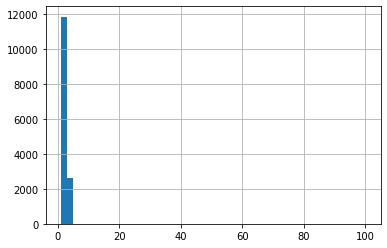

In [44]:
data['ceiling_height'].hist(bins = 50)

У нас определенно есть аномальные значения, которые необходимо обработать. Проведем оценку этих аномальных данных

<AxesSubplot:>

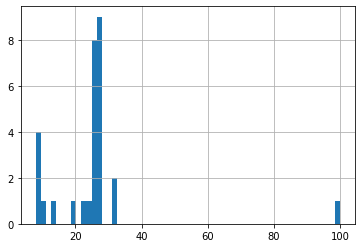

In [45]:
data.query('ceiling_height > 6')['ceiling_height'].hist(bins=60)

В некоторых отдельных лотах возможна высота потолков до 10 метров, все, что находится выше, мы принимаем как аномалию возникшую из-за технической ошибки при получении данных. Скорее всего, это дробные числа формата 2.8, у которых пропала запятая


In [46]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] /= 10

<AxesSubplot:>

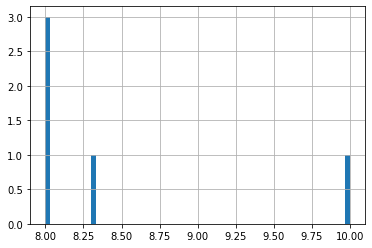

In [47]:
data.query('ceiling_height > 6')['ceiling_height'].hist(bins=60)

<AxesSubplot:>

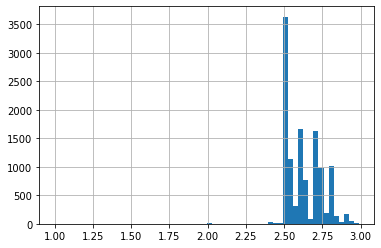

In [48]:
data.query('ceiling_height <3')['ceiling_height'].hist(bins=60)

In [49]:
data.query('ceiling_height <2.5')['ceiling_height'].count()

78

По итогу нашей обработки мы получили 78 квартир с неествественно низкими потолками. Удалим эти значения 

In [50]:
data = data.query('2.5 <= ceiling_height or ceiling_height.isnull()').reset_index(drop=True)

In [51]:
#check
data['ceiling_height'].describe()

count    14417.000000
mean         2.730507
std          0.298009
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

**Б. total_area**

Для начала проведем проверку статистических данных

In [52]:
print(data['total_area'].describe())

count    23535.000000
mean        60.378979
std         35.691491
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64


<AxesSubplot:>

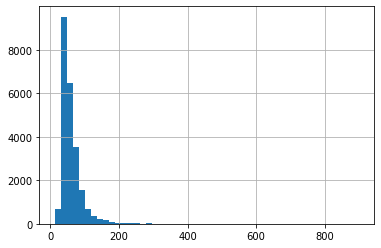

In [53]:
data['total_area'].hist(bins = 50)

Следующим этапом отметем особенно большие объекты и рассмотрим объекты в естественном диапазоне

<AxesSubplot:>

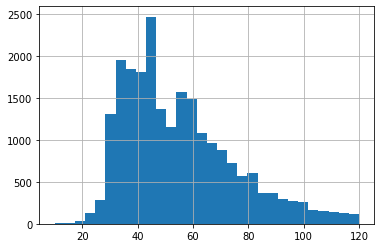

In [54]:
data['total_area'].hist(range=(10, 120), bins = 30)

Уберем из нашей выборки строки со значением ниже 20 м, поскольку это объекты, которые могут представлять из себя комнаты или студии с общим коридором

In [55]:
data = data.query('total_area >= 20').reset_index(drop=True)

In [56]:
data['total_area'].describe()

count    23508.000000
mean        60.429253
std         35.681042
min         20.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

**В. rooms**

В данном столбце были замечены значения 0. Нам необходимо их обработать

In [57]:
data['rooms'].describe()

count    23508.000000
mean         2.072954
std          1.078647
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [58]:
data.query('rooms ==0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000,27.00,2017-03-30,0,NaN,24,15.50,2,False,...,NaN,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,181
345,4,2320000,25.00,2017-09-27,0,NaN,14,17.00,1,False,...,NaN,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,45
436,8,2480000,27.11,2018-03-12,0,NaN,17,24.75,4,False,...,NaN,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64
503,0,3375000,34.40,2017-03-28,0,NaN,26,24.30,19,False,...,NaN,1,посёлок Парголово,53115.0,19292.0,0,NaN,1,593.0,430
602,2,1850000,25.00,2019-02-20,0,NaN,10,NaN,7,False,...,NaN,0,посёлок Шушары,NaN,NaN,0,NaN,0,NaN,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23023,7,3200000,26.00,2017-09-01,0,NaN,25,18.00,16,False,...,NaN,0,Санкт-Петербург,11405.0,13222.0,0,NaN,1,623.0,14
23255,0,2500000,27.70,2017-09-28,0,NaN,24,18.00,4,False,...,NaN,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,4
23365,15,3350000,26.00,2018-09-07,0,NaN,19,NaN,8,False,...,NaN,0,Санкт-Петербург,18090.0,17092.0,0,NaN,2,112.0,31
23402,10,1450000,29.00,2017-11-11,0,NaN,9,18.00,8,False,...,NaN,2,Никольское,NaN,NaN,0,NaN,0,NaN,82


По представленным характеристикам (небольшая площадь и отсутствие обозначенной зоны кухни) можно сделать вывод, что речь идет о студиях, которые с технической точки зрения представляют из себя 1 комнату общего назначения

In [59]:
data.query('rooms ==0')['studio']

144       True
345      False
436       True
503      False
602       True
         ...  
23023     True
23255    False
23365     True
23402    False
23447     True
Name: studio, Length: 186, dtype: bool

Данный вывод показывает, что наше предположение подтвердилось, но так как студия - это формат планировки, мы можем указать значение в данном случае равным 1 (студия - 1 функциональная комната)

In [60]:
data.loc[data['rooms'] == 0, 'rooms'] = 1

In [61]:
#check 
data.query('rooms ==0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23508 entries, 0 to 23507
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23508 non-null  int64         
 1   last_price            23508 non-null  int64         
 2   total_area            23508 non-null  float64       
 3   first_day_exposition  23508 non-null  datetime64[ns]
 4   rooms                 23508 non-null  int64         
 5   ceiling_height        14401 non-null  float64       
 6   floors_total          23508 non-null  int64         
 7   living_area           21653 non-null  float64       
 8   floor                 23508 non-null  int64         
 9   is_apartment          23508 non-null  bool          
 10  studio                23508 non-null  bool          
 11  open_plan             23508 non-null  bool          
 12  kitchen_area          21308 non-null  float64       
 13  balcony         

#### Обработка неявных дубликатов

В данном пункте будет вестись обработка столбца locality_name

In [63]:
data['locality_name'].isna().mean()

0.002041858090862685

Мы обнаружили пропуски, но так как их доля незначительна, мы можем их отбросить

In [64]:
data.dropna(subset=['locality_name'], inplace=True)
data = data.reset_index(drop=True)

#check
data['locality_name'].isna().mean()

0.0

In [65]:
data['locality_name'].value_counts()

Санкт-Петербург                      15594
посёлок Мурино                         520
посёлок Шушары                         438
Всеволожск                             397
Пушкин                                 365
                                     ...  
деревня Шпаньково                        1
поселок Севастьяново                     1
коттеджный посёлок Лесное                1
садовое товарищество Приладожский        1
посёлок Высокоключевой                   1
Name: locality_name, Length: 363, dtype: int64

У нас выявлено 241 уникальное значение. Некоторые из них являются неявными дубликатами,  их мы уберем, но также для дальнейшего анализа их удобно будет сгруппировать

In [66]:
data['locality_name'] = data['locality_name'].str.lower()

data['locality_name'] = data['locality_name'].str.replace('ё','е')

#check
print(data['locality_name'].unique())
print(len(data['locality_name'].unique()))

['санкт-петербург' 'поселок шушары' 'городской поселок янино-1'
 'поселок парголово' 'поселок мурино' 'ломоносов' 'сертолово' 'петергоф'
 'пушкин' 'деревня кудрово' 'коммунар' 'колпино'
 'поселок городского типа красный бор' 'гатчина' 'деревня федоровское'
 'выборг' 'кронштадт' 'кировск' 'деревня новое девяткино'
 'поселок металлострой' 'поселок городского типа лебяжье'
 'поселок городского типа сиверский' 'поселок молодцово'
 'поселок городского типа кузьмоловский'
 'садовое товарищество новая ропша' 'павловск' 'деревня пикколово'
 'всеволожск' 'волхов' 'кингисепп' 'приозерск' 'сестрорецк'
 'деревня куттузи' 'поселок аннино' 'поселок городского типа ефимовский'
 'поселок плодовое' 'деревня заклинье' 'поселок торковичи'
 'поселок первомайское' 'красное село' 'поселок понтонный' 'сясьстрой'
 'деревня старая' 'деревня лесколово' 'сланцы' 'село путилово' 'ивангород'
 'мурино' 'шлиссельбург' 'никольское' 'зеленогорск' 'сосновый бор'
 'поселок новый свет' 'деревня оржицы' 'деревня кальтино'

Мы избавились от некоторых дубликатов, теперь сгруппируем для анализа в будущем

In [67]:
def groupify(row):
    st = row.split()
    if len(st)==1:
        return "без типа"
    else:
        if "поселок" in st:
            return "поселок"
        if "деревня" in st:
            return "деревня"
        if "село" in st:
            return "село"

data['locality_type'] = data['locality_name'].apply(groupify)
    

In [68]:
data['locality_type'].value_counts()

без типа    19557
поселок      2637
деревня       939
село          206
Name: locality_type, dtype: int64

In [69]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,0,без типа
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81,поселок
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,без типа
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424,без типа
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,без типа


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23460 entries, 0 to 23459
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23460 non-null  int64         
 1   last_price            23460 non-null  int64         
 2   total_area            23460 non-null  float64       
 3   first_day_exposition  23460 non-null  datetime64[ns]
 4   rooms                 23460 non-null  int64         
 5   ceiling_height        14387 non-null  float64       
 6   floors_total          23460 non-null  int64         
 7   living_area           21610 non-null  float64       
 8   floor                 23460 non-null  int64         
 9   is_apartment          23460 non-null  bool          
 10  studio                23460 non-null  bool          
 11  open_plan             23460 non-null  bool          
 12  kitchen_area          21269 non-null  float64       
 13  balcony         

#### Обработка пропусков

**А. airport_nearest**


Посмотрим на статические показатели и распределение значений

In [71]:
data['airports_nearest'].describe()

count    17973.000000
mean     28808.054471
std      12635.021438
min          0.000000
25%      18573.000000
50%      26765.000000
75%      37288.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:>

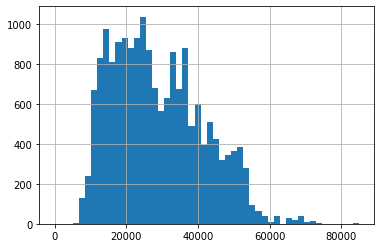

In [72]:
data['airports_nearest'].hist(bins=50)

На гистограмме можно обнаружить аномально малые значения расстояния до аэропорта. Посчитаем их количество

In [73]:
len(data.query('airports_nearest < 5000'))

1

Посчитаем долю пустых значений

In [74]:
data['airports_nearest'].isna().mean()

0.23388746803069055

Остальные пробелы заполним, принимая, что в одном населенном пункте расстояние до ближайшего аэропорта будет одинаковым

In [75]:
def fill_air(row):
    return data[(data['locality_name'] == row['locality_name']) & (data['airports_nearest'].isnull() == False)]['airports_nearest'].median()

In [76]:
data.loc[data['airports_nearest'].isnull(), 'airports_nearest'] = data[data['airports_nearest'].isnull()].apply(fill_air, axis=1)

In [77]:
data['airports_nearest'].isna().mean()

0.22996589940323955

In [78]:
data['airports_nearest'].describe()

count    18065.000000
mean     28799.435594
std      12608.675791
min          0.000000
25%      18591.000000
50%      26766.500000
75%      37228.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23460 entries, 0 to 23459
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23460 non-null  int64         
 1   last_price            23460 non-null  int64         
 2   total_area            23460 non-null  float64       
 3   first_day_exposition  23460 non-null  datetime64[ns]
 4   rooms                 23460 non-null  int64         
 5   ceiling_height        14387 non-null  float64       
 6   floors_total          23460 non-null  int64         
 7   living_area           21610 non-null  float64       
 8   floor                 23460 non-null  int64         
 9   is_apartment          23460 non-null  bool          
 10  studio                23460 non-null  bool          
 11  open_plan             23460 non-null  bool          
 12  kitchen_area          21269 non-null  float64       
 13  balcony         

**Б. city_center_nearest**

Данный пункт выполняется аналогично пункту А

In [80]:
data['city_сenters_nearest'].describe()

count    17996.000000
mean     14194.369249
std       8613.429371
min        181.000000
25%       9238.000000
50%      13100.000000
75%      16285.000000
max      65968.000000
Name: city_сenters_nearest, dtype: float64

<AxesSubplot:>

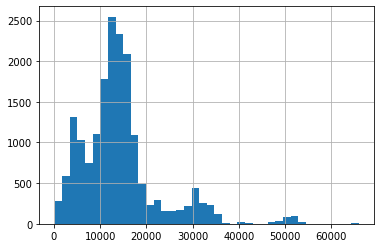

In [81]:
data['city_сenters_nearest'].hist(bins =40)

Посчитаем долю пустых значений

In [82]:
data['city_сenters_nearest'].isna().mean()

0.23290707587382778

Данные в пропусках мы будем заполнять по примеру предыдущего пункта - медианным значением из того же населенного пункта

In [83]:
def fill_center(row):
    return data[(data['locality_name'] == row['locality_name']) & (data['city_centers_nearest'].isnull() == False)]['city_centers_nearest'].median()

In [84]:
data.loc[data['city_сenters_nearest'].isnull(), 'city_сenters_nearest'] = data[data['city_сenters_nearest'].isnull()].apply(fill_air, axis=1)

In [85]:
data['city_сenters_nearest'].isna().mean()

0.22996589940323955

In [86]:
data['city_сenters_nearest'].describe()

count    18065.000000
mean     14243.559424
std       8641.719432
min        181.000000
25%       9267.000000
50%      13123.000000
75%      16333.000000
max      67872.500000
Name: city_сenters_nearest, dtype: float64

<AxesSubplot:>

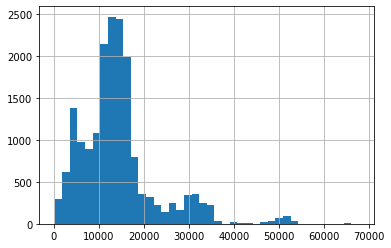

In [87]:
data['city_сenters_nearest'].hist(bins =40)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23460 entries, 0 to 23459
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23460 non-null  int64         
 1   last_price            23460 non-null  int64         
 2   total_area            23460 non-null  float64       
 3   first_day_exposition  23460 non-null  datetime64[ns]
 4   rooms                 23460 non-null  int64         
 5   ceiling_height        14387 non-null  float64       
 6   floors_total          23460 non-null  int64         
 7   living_area           21610 non-null  float64       
 8   floor                 23460 non-null  int64         
 9   is_apartment          23460 non-null  bool          
 10  studio                23460 non-null  bool          
 11  open_plan             23460 non-null  bool          
 12  kitchen_area          21269 non-null  float64       
 13  balcony         

**В. parks_nearest**

В данном пункте мы рассмотрим статистические данные, распределение значений. Далее мы проверим гипотезу, что данные о ближайшем парке не указаны в том случае, если ближайшего парка в радиусе 3км нет

In [89]:
data['parks_nearest'].describe()

count    7991.000000
mean      490.666625
std       342.158647
min         1.000000
25%       287.500000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [90]:
print(data['parks_nearest'].isna().mean())
print(data['parks_nearest'].isna().sum())

0.6593776641091219
15469


Максимальное обозначенное расстояние равно 3190 м, а доля пропусков равна 53%. Далее проверим нашу гипотезу

In [91]:
data.loc[(data['parks_nearest'].isna()==True)&(data['parks_around_3000'] == 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81,поселок
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,0,городской поселок янино-1,NaN,NaN,0,NaN,0,NaN,55,поселок
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,1,поселок парголово,52996.0,19143.0,0,NaN,0,NaN,155,поселок
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,2,санкт-петербург,23982.0,11634.0,0,NaN,0,NaN,0,без типа
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,0,поселок мурино,NaN,NaN,0,NaN,0,NaN,189,поселок
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23452,11,9470000,72.90,2016-10-13,2,2.75,25,40.30,7,False,...,1,санкт-петербург,19424.0,4489.0,0,NaN,1,806.0,519,без типа
23453,2,1350000,30.00,2017-07-07,1,NaN,5,17.50,4,False,...,0,тихвин,NaN,NaN,0,NaN,0,NaN,413,без типа
23456,14,3100000,59.00,2018-01-15,3,NaN,5,38.00,4,False,...,0,тосно,NaN,NaN,0,NaN,0,NaN,45,без типа
23457,18,2500000,56.70,2018-02-11,2,NaN,3,29.70,1,False,...,0,село рождествено,NaN,NaN,0,NaN,0,NaN,0,село


Мы получили, что наши пропущенные значения - это и есть лоты, у которых в радиусе 3км нет парков, но мы не можем заменить расстояние на условные 4000м, так как это сильно повлияет на статистические параметры (доля дальних лотов - 53%)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23460 entries, 0 to 23459
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23460 non-null  int64         
 1   last_price            23460 non-null  int64         
 2   total_area            23460 non-null  float64       
 3   first_day_exposition  23460 non-null  datetime64[ns]
 4   rooms                 23460 non-null  int64         
 5   ceiling_height        14387 non-null  float64       
 6   floors_total          23460 non-null  int64         
 7   living_area           21610 non-null  float64       
 8   floor                 23460 non-null  int64         
 9   is_apartment          23460 non-null  bool          
 10  studio                23460 non-null  bool          
 11  open_plan             23460 non-null  bool          
 12  kitchen_area          21269 non-null  float64       
 13  balcony         

**Г. ponds_nearest**

В данном пункте действия выполняются аналогично пункту В. Есть также предварительное предположение, что данные заполнить мы не сможем по той же причине, что и ранее

In [93]:
data['ponds_nearest'].describe()

count    8997.000000
mean      518.448372
std       277.881118
min        13.000000
25%       293.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

<AxesSubplot:>

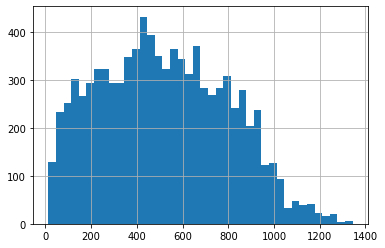

In [94]:
data['ponds_nearest'].hist(bins =40)

In [95]:
print(data['ponds_nearest'].isna().mean())
print(data['ponds_nearest'].isna().sum())

0.6164961636828644
14463


In [96]:
data.loc[(data['ponds_nearest'].isna()==True)&(data['ponds_around_3000'] == 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81,поселок
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,0,городской поселок янино-1,NaN,NaN,0,NaN,0,NaN,55,поселок
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,1,поселок парголово,52996.0,19143.0,0,NaN,0,NaN,155,поселок
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,2,санкт-петербург,23982.0,11634.0,0,NaN,0,NaN,0,без типа
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,0,поселок мурино,NaN,NaN,0,NaN,0,NaN,189,поселок
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23451,3,5500000,52.00,2018-07-19,2,NaN,5,31.00,2,False,...,0,санкт-петербург,20151.0,6263.0,1,300.0,0,NaN,15,без типа
23453,2,1350000,30.00,2017-07-07,1,NaN,5,17.50,4,False,...,0,тихвин,NaN,NaN,0,NaN,0,NaN,413,без типа
23456,14,3100000,59.00,2018-01-15,3,NaN,5,38.00,4,False,...,0,тосно,NaN,NaN,0,NaN,0,NaN,45,без типа
23457,18,2500000,56.70,2018-02-11,2,NaN,3,29.70,1,False,...,0,село рождествено,NaN,NaN,0,NaN,0,NaN,0,село


Мы получили тот же итог, что и в предыдущем пункте, поэтому вывод получим тот же - мы не можем заполнить пустые значения каким-то условным, потому что это негативно скажется на статистической оценке

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23460 entries, 0 to 23459
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23460 non-null  int64         
 1   last_price            23460 non-null  int64         
 2   total_area            23460 non-null  float64       
 3   first_day_exposition  23460 non-null  datetime64[ns]
 4   rooms                 23460 non-null  int64         
 5   ceiling_height        14387 non-null  float64       
 6   floors_total          23460 non-null  int64         
 7   living_area           21610 non-null  float64       
 8   floor                 23460 non-null  int64         
 9   is_apartment          23460 non-null  bool          
 10  studio                23460 non-null  bool          
 11  open_plan             23460 non-null  bool          
 12  kitchen_area          21269 non-null  float64       
 13  balcony         

**Д. ceiling_height \ living_area \ kitchen_area**

При заполнении пустых значений в данных параметрах, мы будем использовать медианные значения из таких же квартир. Параметры, по которым будет определяться схожесть квартир, определим через коэффиценты корреляции

In [98]:
#check count of na
data['ceiling_height'].isna().mean()

0.38674339300937766

In [99]:
#check parameters for equal apartments
data.corr()['ceiling_height'].sort_values(ascending = False)

ceiling_height          1.000000
total_area              0.448224
living_area             0.426007
kitchen_area            0.392317
last_price              0.373237
rooms                   0.277992
parks_around_3000       0.276682
ponds_around_3000       0.250338
is_apartment            0.094566
days_exposition         0.086923
total_images            0.039360
studio                  0.014922
open_plan               0.010617
floor                  -0.046132
parks_nearest          -0.056900
balcony                -0.064538
floors_total           -0.091981
airports_nearest       -0.099520
ponds_nearest          -0.141414
city_сenters_nearest   -0.338566
Name: ceiling_height, dtype: float64

В качестве параметров для схожестки возьмем самый коррелирующий параметр


In [100]:
def fill_ceiling(row):
    return data[(data.index != row.name) & (row['floors_total'] == data['floors_total']) &
        (abs(row['total_area'] - data['total_area']) <= 10) & (data['ceiling_height'].isnull() == False)]['ceiling_height'].median() 

data.loc[data['ceiling_height'].isnull(), 'ceiling_height'] = data[data['ceiling_height'].isnull()].apply(fill_ceiling, axis =1)

In [101]:
data['ceiling_height'].isna().mean()

0.001619778346121057

In [102]:
data['ceiling_height'].describe()

count    23422.000000
mean         2.711227
std          0.256530
min          2.500000
25%          2.550000
50%          2.650000
75%          2.750000
max         10.000000
Name: ceiling_height, dtype: float64

In [103]:
data['ceiling_height'].isna().mean()

0.001619778346121057

Мы сократили долю пустых значений до незначительной и теперь можем удалить их

In [104]:
data.dropna(subset=['ceiling_height'], inplace=True)
data['ceiling_height'].isna().mean()

0.0

Аналогично поступим с площадью кухни и жилой площадью

In [105]:
print('Доля пропусков значений площади кухни в датасете равна ', data['kitchen_area'].isna().mean())
print('Доля пропусков значений жилой площади в датасете равна ', data['living_area'].isna().mean())

Доля пропусков значений площади кухни в датасете равна  0.09341644607633849
Доля пропусков значений жилой площади в датасете равна  0.07872939970967467


In [106]:
print("Корреляция с площадью кухни")
data.corr()['kitchen_area'].sort_values(ascending = False)

Корреляция с площадью кухни


kitchen_area            1.000000
total_area              0.605992
last_price              0.530060
living_area             0.420462
ceiling_height          0.410428
rooms                   0.263787
ponds_around_3000       0.173097
floors_total            0.169579
floor                   0.137748
parks_around_3000       0.121450
total_images            0.106087
days_exposition         0.070337
is_apartment            0.052290
balcony                 0.047034
parks_nearest           0.019802
airports_nearest        0.007587
ponds_nearest          -0.102455
city_сenters_nearest   -0.190338
studio                       NaN
open_plan                    NaN
Name: kitchen_area, dtype: float64

In [107]:
print("Корреляция с жилой площадью")
data.corr()['living_area'].sort_values(ascending = False)

Корреляция с жилой площадью


living_area             1.000000
total_area              0.939525
rooms                   0.853769
last_price              0.612947
ceiling_height          0.460437
kitchen_area            0.420462
parks_around_3000       0.214699
ponds_around_3000       0.180356
total_images            0.104085
days_exposition         0.092529
is_apartment            0.029146
balcony                -0.014204
open_plan              -0.033844
parks_nearest          -0.053232
studio                 -0.055329
airports_nearest       -0.058371
ponds_nearest          -0.085158
floor                  -0.102913
floors_total           -0.173022
city_сenters_nearest   -0.232269
Name: living_area, dtype: float64

Заполнять значениями мы будем по аналогии с предыдущим пунктом

In [108]:
def fill_living(row):
    return data[(data.index != row.name) &(abs(data['total_area'] - row['total_area']) <=10) & (data['rooms'] == row['rooms']) &
        (data['living_area'].isnull() == False)]['living_area'].median()  

data.loc[data['living_area'].isnull(), 'living_area'] = data[data['living_area'].isnull()].apply(fill_living, axis=1)

In [109]:
data['living_area'].isna().mean()

0.00042694902228673895

Мы значительно сократили долю пустых значений до незначительной, поэтому остальные можем просто выбросить

In [110]:
data.dropna(subset=['living_area'], inplace=True)

In [111]:
data['living_area'].isna().sum()

0

In [112]:
def fill_kitchen(row):
    return data[(data.index != row.name) &(abs(data['total_area'] - row['total_area']) <=10) & (abs(data['last_price'] - row['last_price']) <=50000) &
        (data['kitchen_area'].isnull() == False)]['kitchen_area'].median()  

data.loc[data['kitchen_area'].isnull(), 'kitchen_area'] = data[data['kitchen_area'].isnull()].apply(fill_kitchen, axis=1)

In [113]:
data['kitchen_area'].isna().mean()

0.0029044934221766614

In [114]:
data.dropna(subset=['kitchen_area'], inplace=True)

Итоговое описание данных

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23344 entries, 0 to 23459
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23344 non-null  int64         
 1   last_price            23344 non-null  int64         
 2   total_area            23344 non-null  float64       
 3   first_day_exposition  23344 non-null  datetime64[ns]
 4   rooms                 23344 non-null  int64         
 5   ceiling_height        23344 non-null  float64       
 6   floors_total          23344 non-null  int64         
 7   living_area           23344 non-null  float64       
 8   floor                 23344 non-null  int64         
 9   is_apartment          23344 non-null  bool          
 10  studio                23344 non-null  bool          
 11  open_plan             23344 non-null  bool          
 12  kitchen_area          23344 non-null  float64       
 13  balcony         

#### Выводы

1. **Оформление датасета**:
   - Названия столбцов были приведены к единому стандарту для удобства работы. Например, `cityCenters_nearest` переименован в `city_сenters_nearest`, а `parks_around3000` — в `parks_around_3000`.
   - Проверка структуры данных показала, что большинство столбцов имеют корректные названия и типы данных, но некоторые требуют дополнительной обработки.

2. **Проверка данных**:
   - Столбцы `total_images`, `studio`, `open_plan`, `floor` и `living_area` не содержат аномалий и пропусков, которые могли бы повлиять на анализ.
   - В столбце `rooms` обнаружены значения `0`, которые были интерпретированы как студии (1 комната) и заменены на `1`.
   - В столбце `floors_total` обнаружены пропуски, которые были удалены, так как их доля (0,36%) незначительна.

3. **Обработка типов данных**:
   - Столбец `last_price` был преобразован из `float` в `int`, так как копейки в ценах не имеют смысла.
   - Столбец `first_day_exposition` был преобразован из строкового формата в `datetime` для удобства работы с датами.
   - Столбец `floors_total` был преобразован в `int`, так как количество этажей не может быть дробным.
   - Столбец `is_apartment` был преобразован в `bool`, а пропуски заполнены значением `False`, так как апартаменты составляют малую долю данных.
   - Столбец `balcony` был преобразован в `int`, а пропуски заполнены нулями, так как отсутствие балкона логично интерпретировать как `0`.
   - Столбцы `parks_around_3000` и `ponds_around_3000` были преобразованы в `int`, а пропуски заполнены нулями, так как отсутствие парков или водоемов в радиусе 3 км логично интерпретировать как `0`.
   - Столбец `days_exposition` был преобразован в `int`, а пропуски заполнены нулями, так как отсутствие данных о длительности экспозиции можно интерпретировать как `0`.

4. **Обработка аномалий**:
   - В столбце `ceiling_height` обнаружены аномальные значения (например, высота потолков 100 метров). Эти значения были скорректированы (разделены на 10), а значения ниже 2,5 метров удалены как нереалистичные.
   - В столбце `total_area` удалены значения меньше 20 м², так как такие объекты, вероятно, являются комнатами или студиями с общим коридором.

5. **Обработка неявных дубликатов**:
   - В столбце `locality_name` были устранены неявные дубликаты (например, "посёлок Мурино" и "поселок Мурино") путем приведения всех названий к нижнему регистру и замены буквы "ё" на "е".
   - Добавлен столбец `locality_type`, который группирует населенные пункты по типам: "поселок", "деревня", "село" и "без типа".

6. **Обработка пропусков**:
   - Пропуски в столбцах `airports_nearest` и `city_сenters_nearest` были заполнены медианными значениями для соответствующих населенных пунктов.
   - Пропуски в столбцах `parks_nearest` и `ponds_nearest` не были заполнены, так как они связаны с отсутствием парков или водоемов в радиусе 3 км. Заполнение условными значениями могло бы исказить статистику.
   - Пропуски в столбцах `ceiling_height`, `living_area` и `kitchen_area` были заполнены медианными значениями для схожих квартир (с учетом общей площади, количества комнат и других параметров). После заполнения оставшиеся пропуски были удалены, так как их доля стала незначительной.

7. **Итог**:
   - Датасет был очищен от аномалий, пропусков и неявных дубликатов.
   - Типы данных были приведены к корректным форматам, что упростит дальнейший анализ.
   - Добавлены новые столбцы (`locality_type`), которые могут быть полезны для группировки и анализа данных.
   - Доля пропусков в ключевых столбцах была значительно сокращена, что повышает качество данных для построения моделей и анализа.

### Добавьте в таблицу новые столбцы

**А. цена за квадратный метр**

In [116]:
data['price_for_m'] = data['last_price'] / data['total_area']

In [117]:
data['price_for_m'].head()

0    120370.370370
1     82920.792079
2     92785.714286
4    100000.000000
5     95065.789474
Name: price_for_m, dtype: float64

**Б. день публикации объявления**

In [118]:
data['exposition_day'] = data['first_day_exposition'].dt.dayofweek

**В. месяц публикации объявления**

In [119]:
data['exposition_month'] = data['first_day_exposition'].dt.month

**Г. год публикации объявления**

In [120]:
data['exposition_year'] = data['first_day_exposition'].dt.year

**Д. тип этажа квартиры**

In [121]:
def categorize_floor(row):
    if row['floor'] == row['floors_total']:
        return 'Последний'
    if row['floor']==1:
        return 'Первый'
    else:
        return "Другой"

data['floor_category'] = data.apply(categorize_floor, axis =1)
print(data['floor_category'].head(10))


0     Другой
1     Первый
2     Другой
4     Другой
5     Другой
6     Другой
7     Другой
8     Другой
9     Другой
10    Другой
Name: floor_category, dtype: object


**Е. расстояние до центра в км**

In [122]:
data['center_distance_km'] = data['city_сenters_nearest'] //1000
print(data['center_distance_km'].head(50))

0     16.0
1     18.0
2     13.0
4      8.0
5      NaN
6     19.0
7     11.0
8      NaN
9     15.0
10    13.0
11    51.0
12     NaN
13    33.0
14    30.0
15    14.0
16    10.0
17    14.0
18    10.0
19    12.0
20    19.0
21     9.0
22     NaN
23    14.0
24     2.0
25    14.0
26    10.0
27    11.0
28    30.0
29    11.0
30     NaN
31    12.0
32    12.0
33    32.0
34    12.0
35     3.0
36    16.0
37     NaN
38     NaN
39    12.0
40    19.0
41    12.0
42    30.0
43    10.0
44    11.0
45    12.0
46    12.0
47     NaN
48    16.0
49    16.0
50    30.0
Name: center_distance_km, dtype: float64


### Проведите исследовательский анализ данных

#### Оценка параметров

В рамках данного пункта будут просматриваться статистические параметры, а также графики распределений для разных диапазонов значений

**А. общая площадь**

In [123]:
data['total_area'].describe()

count    23344.000000
mean        59.637533
std         32.942928
min         20.000000
25%         40.000000
50%         52.000000
75%         69.200000
max        900.000000
Name: total_area, dtype: float64

In [124]:
data['total_area'].isna().mean()

0.0

Text(0.5, 1.0, 'Общее распределение')

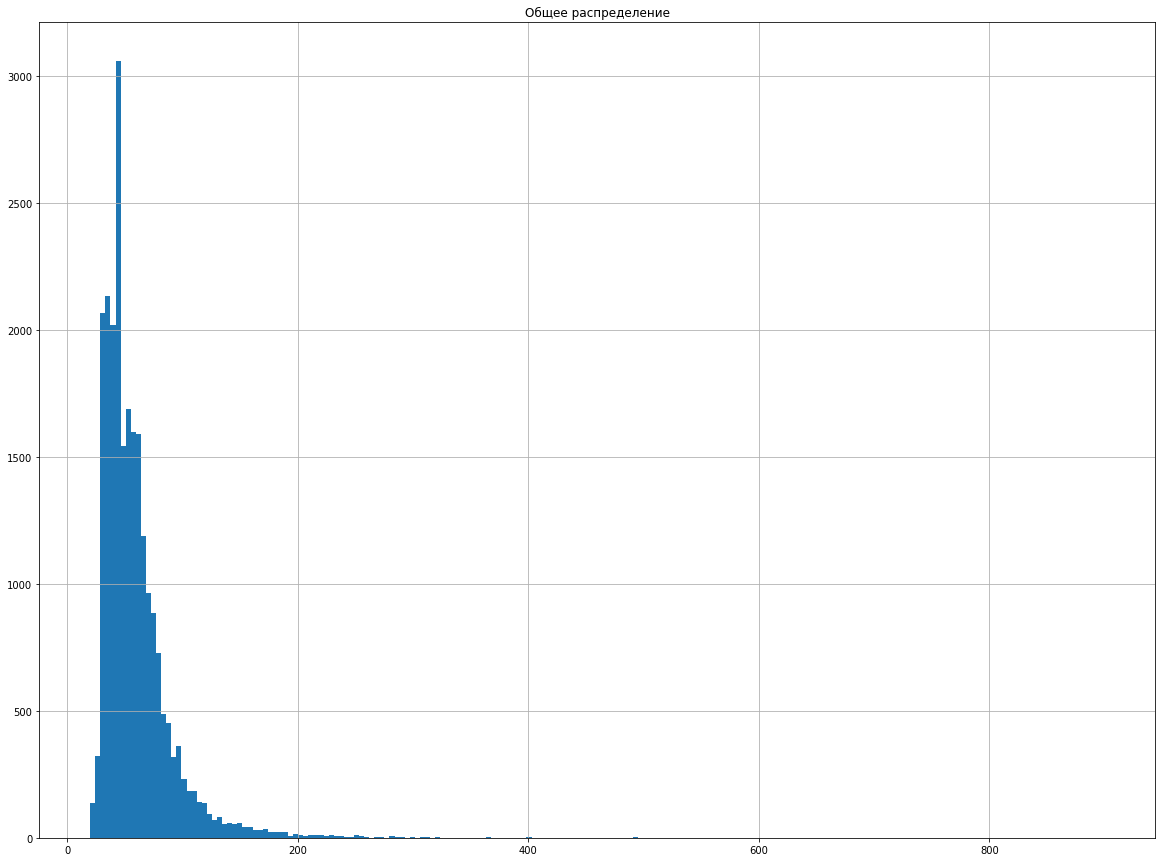

In [125]:
#Посмотрим на общее распределение
data['total_area'].hist(bins = 200, figsize=(20, 15))
plt.title('Общее распределение')

Text(0.5, 1.0, 'Общая группа квартир (до 200 квадратных метров)')

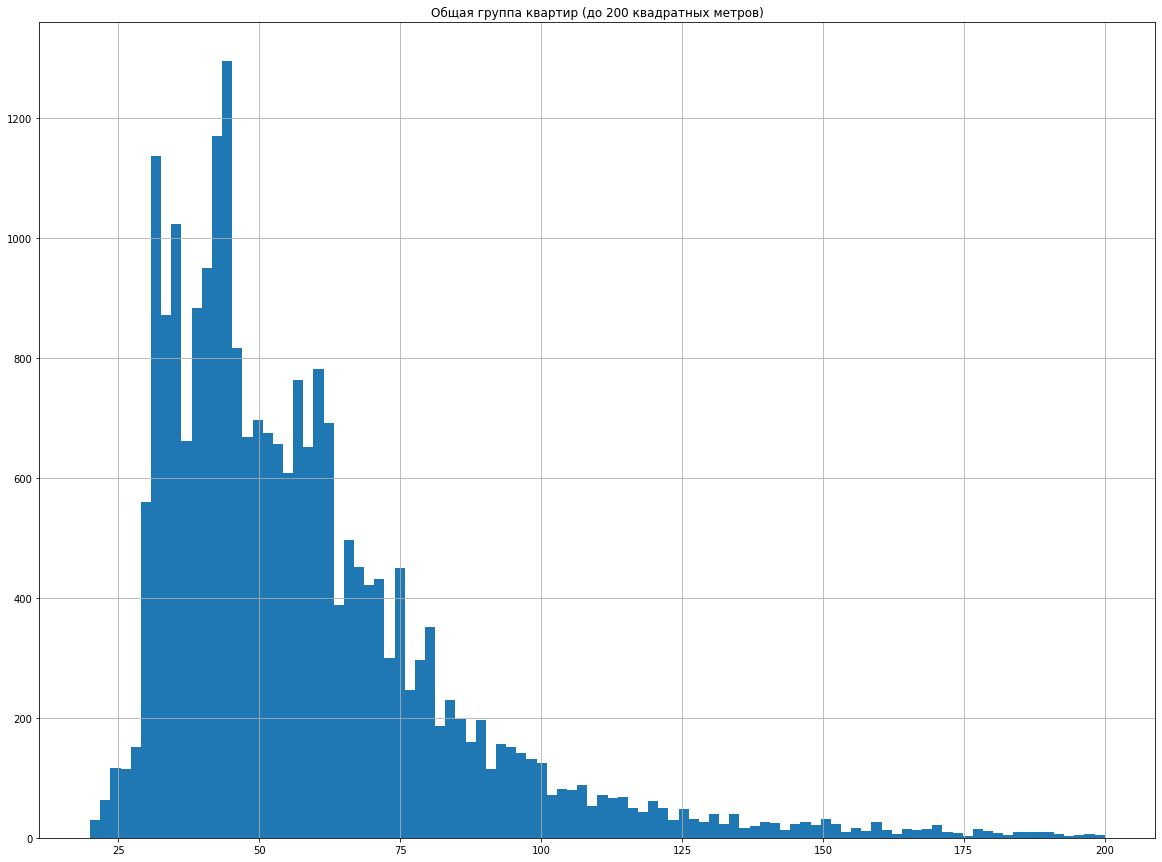

In [126]:
#Посмотрим на распределение основной группы значений
data['total_area'].hist(bins =100, figsize=(20, 15), range = (20, 200))
plt.title('Общая группа квартир (до 200 квадратных метров)')

Text(0.5, 1.0, 'Огромные объекты (от 200 метров)')

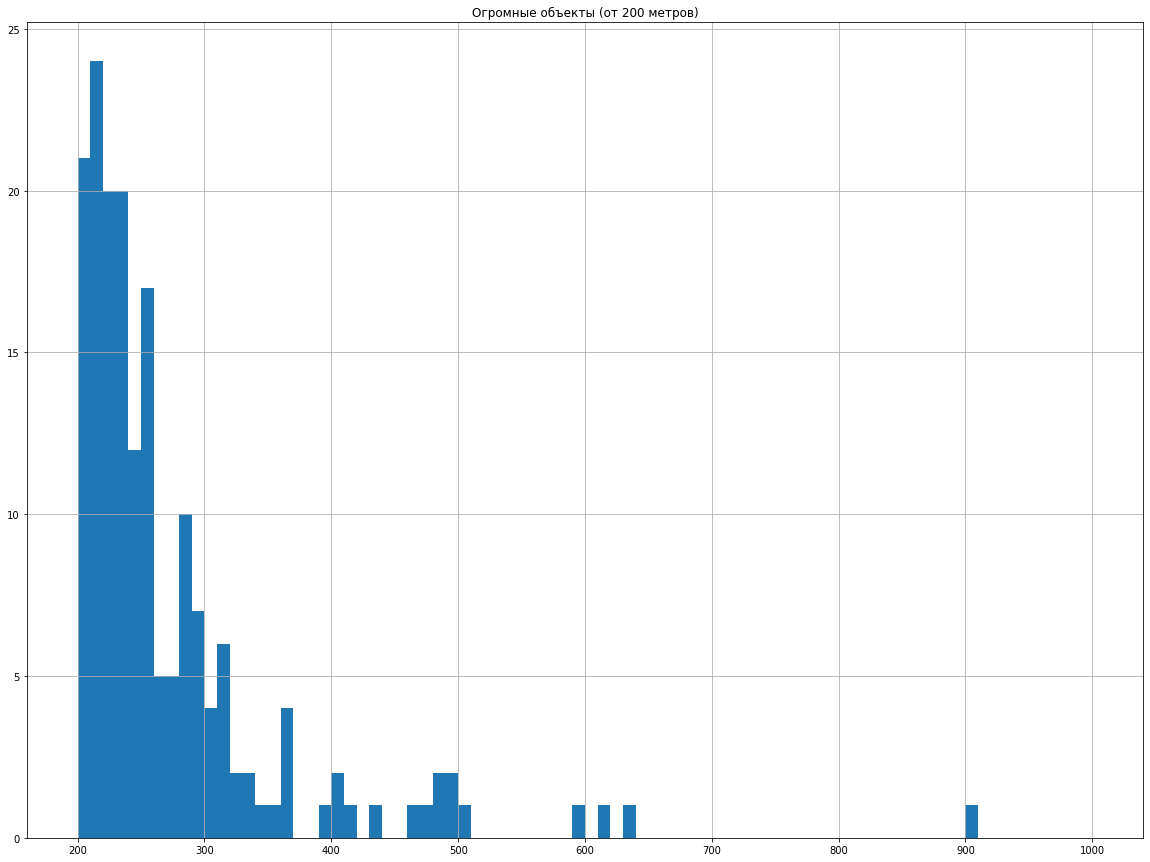

In [127]:
#Посмотрим на распределения хвостовой части - огромных лотов недвижимости
data['total_area'].hist(bins =80, figsize=(20, 15), range = (200, 1000))
plt.title('Огромные объекты (от 200 метров)')

**Б. жилая площадь**

In [128]:
data['living_area'].describe()

count    23344.000000
mean        34.151291
std         21.001115
min          2.000000
25%         18.500000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

In [129]:
data['living_area'].isna().mean()

0.0

Text(0.5, 1.0, 'Общее распределение')

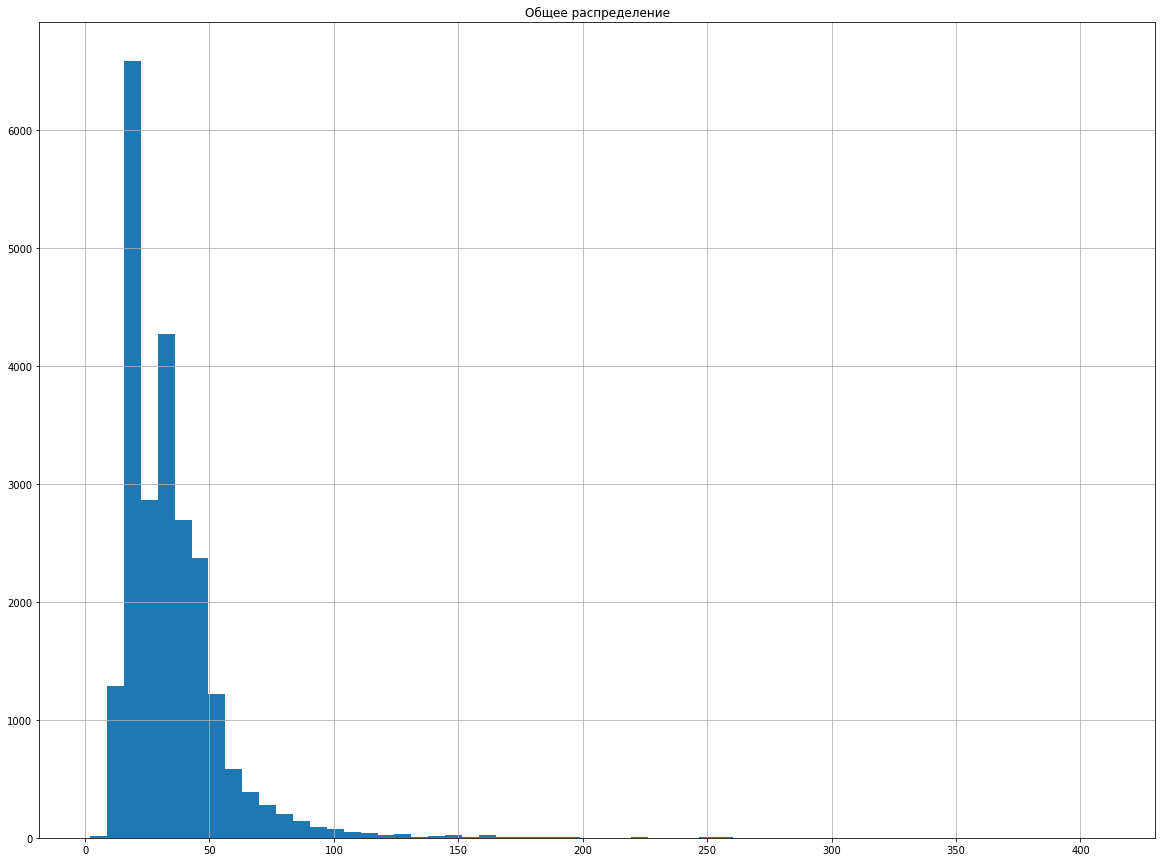

In [130]:
#Посмотрим на общее распределение
data['living_area'].hist(bins = 60, figsize=(20, 15))
plt.title('Общее распределение')

Text(0.5, 1.0, 'Общая группа квартир (жилая площадь до 100 метров)')

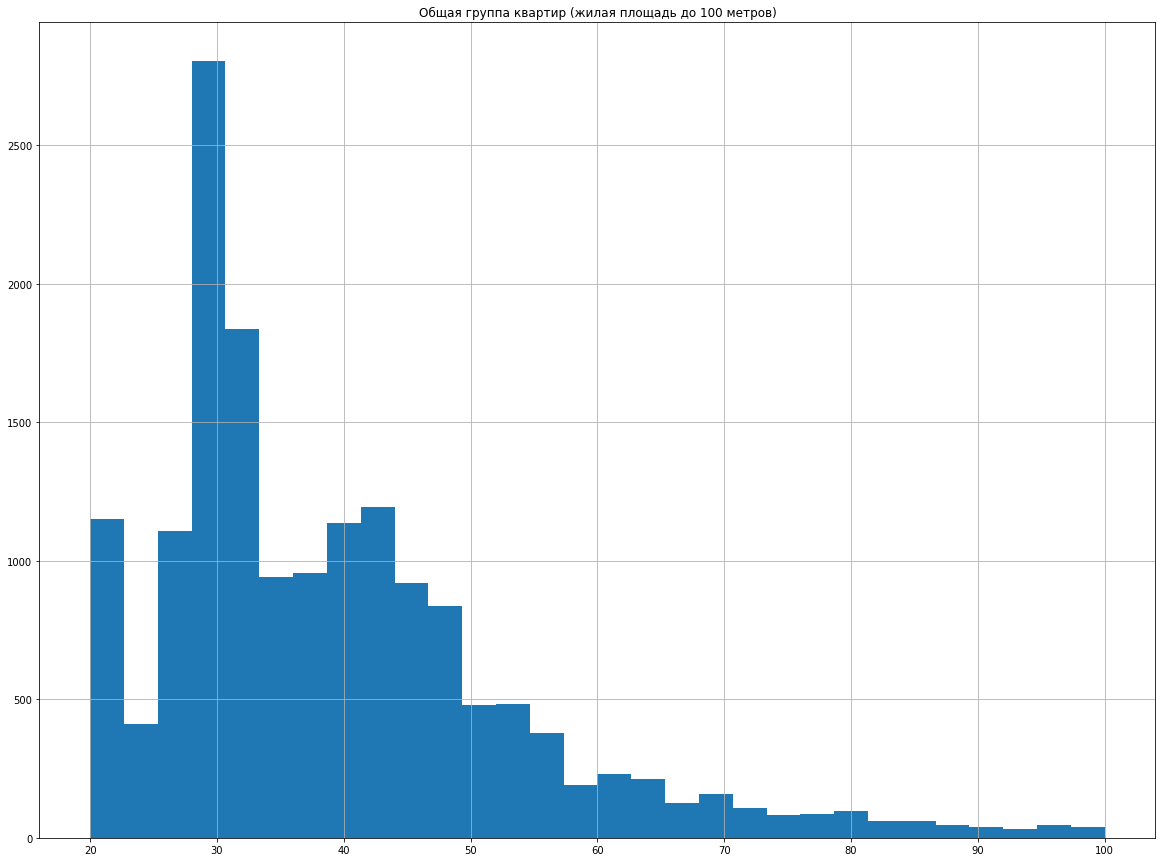

In [131]:
#Посмотрим на распределение основной группы значений
data['living_area'].hist(bins =30, figsize=(20, 15), range = (20, 100))
plt.title('Общая группа квартир (жилая площадь до 100 метров)')

Text(0.5, 1.0, 'Огромные квартиры (жилая площадь от 100 метров)')

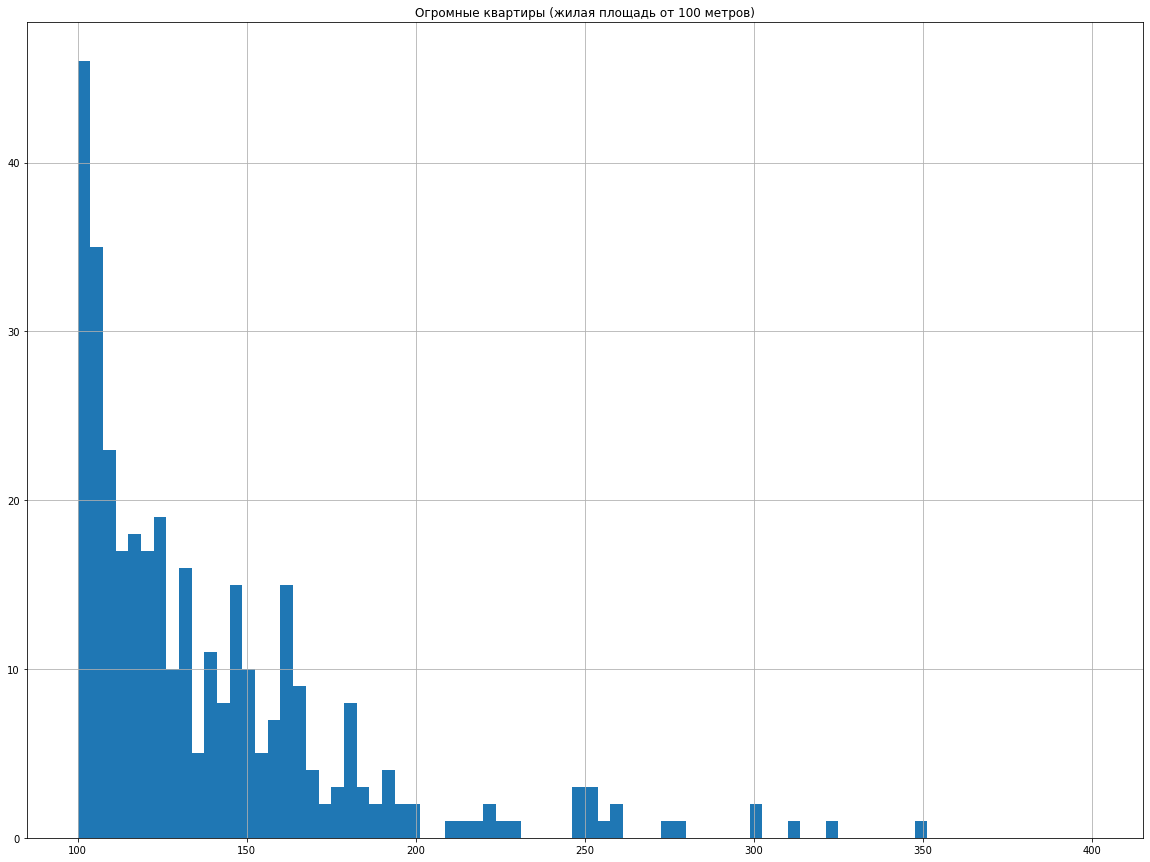

In [132]:
#Посмотрим на распределения хвостовой части - огромных лотов недвижимости
data['living_area'].hist(bins =80, figsize=(20, 15), range = (100, 400))
plt.title('Огромные квартиры (жилая площадь от 100 метров)')

**В. площадь кухни**

In [133]:
data['kitchen_area'].describe()

count    23344.000000
mean        10.400310
std          5.592047
min          1.300000
25%          7.000000
50%          9.000000
75%         11.700000
max        112.000000
Name: kitchen_area, dtype: float64

In [134]:
data['kitchen_area'].isna().mean()

0.0

Text(0.5, 1.0, 'Общее распределение')

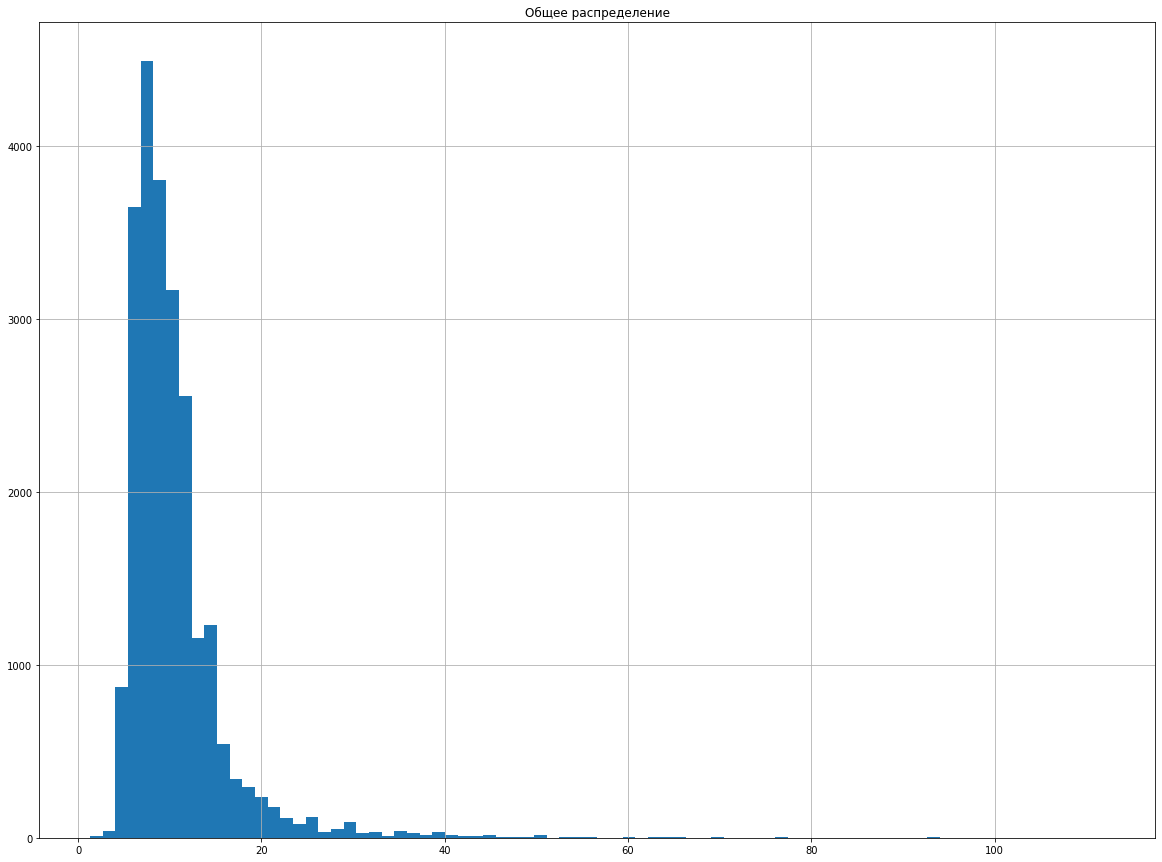

In [135]:
data['kitchen_area'].hist(figsize=(20, 15), bins = 80)
plt.title('Общее распределение')

Text(0.5, 1.0, 'Общая группа квартир (площадь кухни до 30 метров)')

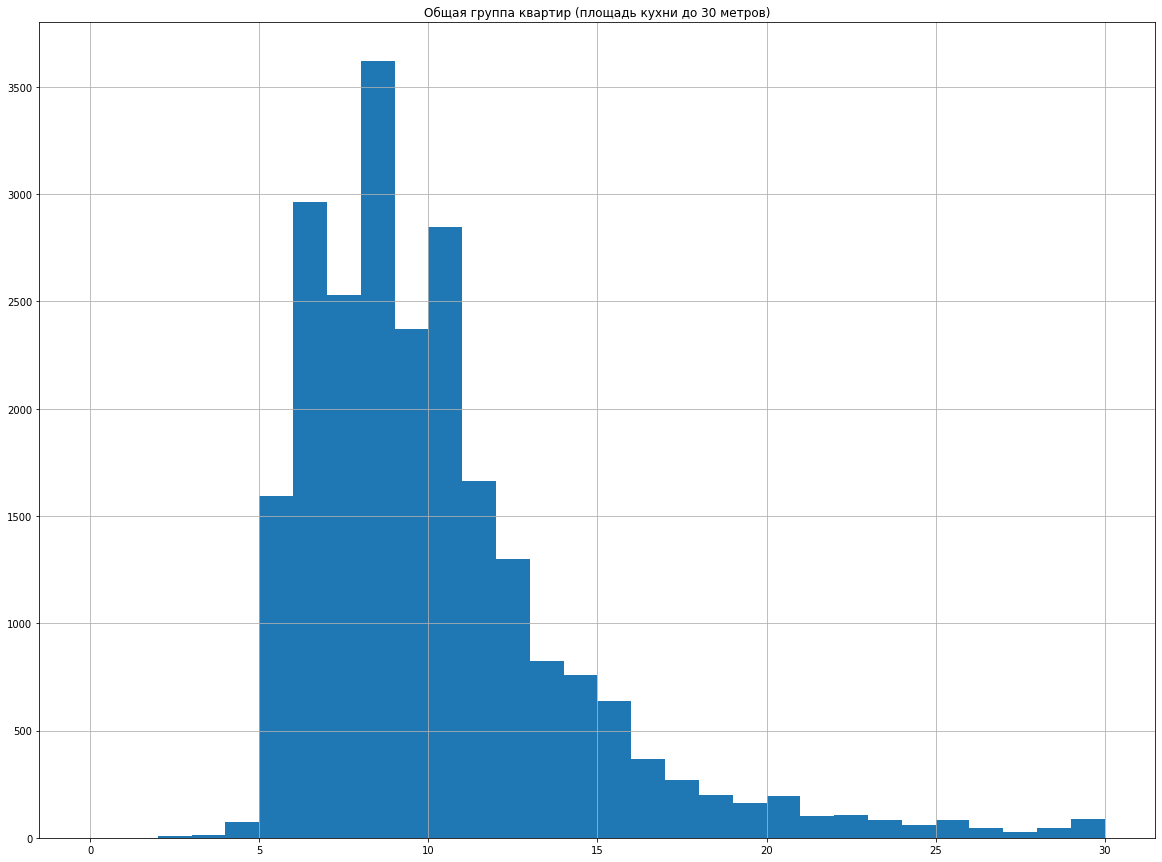

In [136]:
#main group of values
data['kitchen_area'].hist(figsize=(20, 15), bins = 30, range=(0, 30))
plt.title('Общая группа квартир (площадь кухни до 30 метров)')

Text(0.5, 1.0, 'Большие квартиры (площадь кухни от 30 метров)')

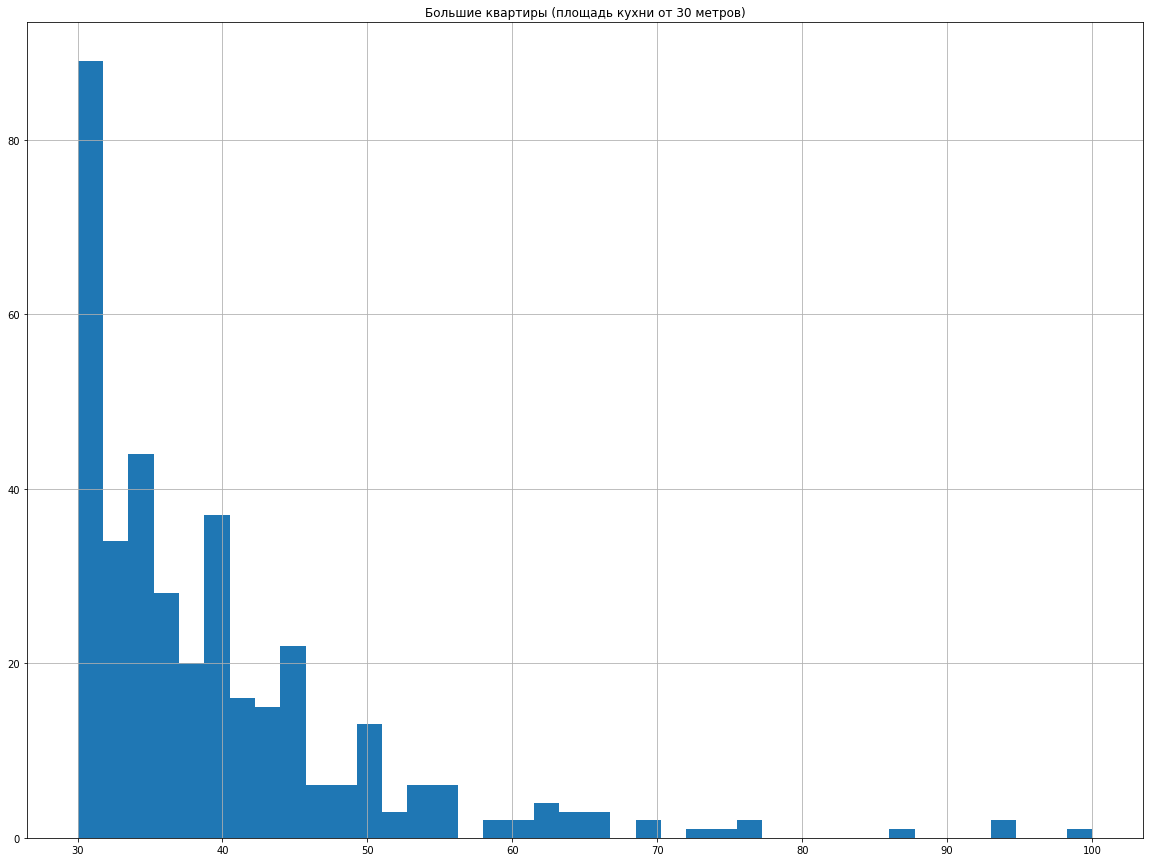

In [137]:
data['kitchen_area'].hist(figsize=(20, 15), bins = 40, range = (30, 100))
plt.title('Большие квартиры (площадь кухни от 30 метров)')

**Г. цена объекта**

In [138]:
data['last_price'].describe()

count    2.334400e+04
mean     6.343064e+06
std      8.743742e+06
min      1.219000e+04
25%      3.414500e+06
50%      4.600000e+06
75%      6.700000e+06
max      4.200000e+08
Name: last_price, dtype: float64

Text(0.5, 1.0, 'Общее распределение')

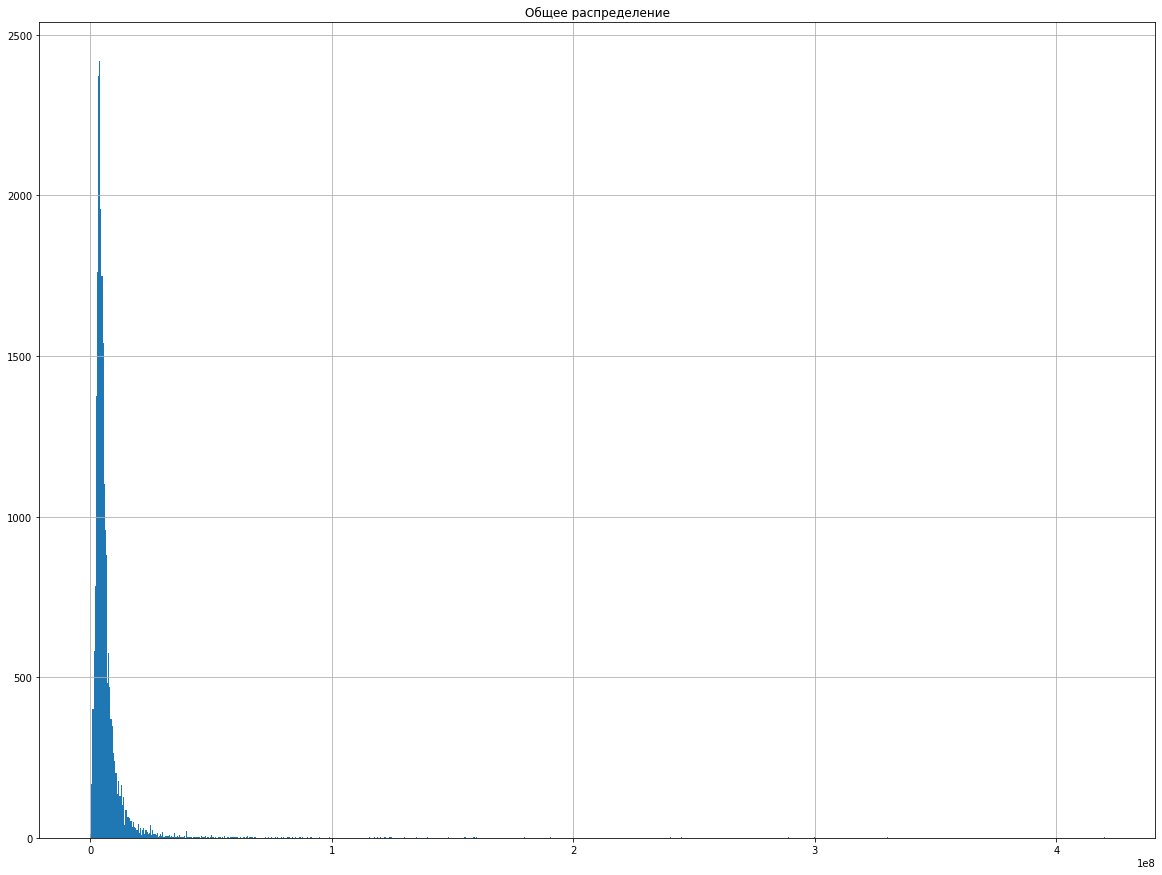

In [139]:
data['last_price'].hist(figsize=(20, 15), bins = 900)
plt.title('Общее распределение')

Text(0.5, 1.0, 'Общая группа квартир (до 20 млн)')

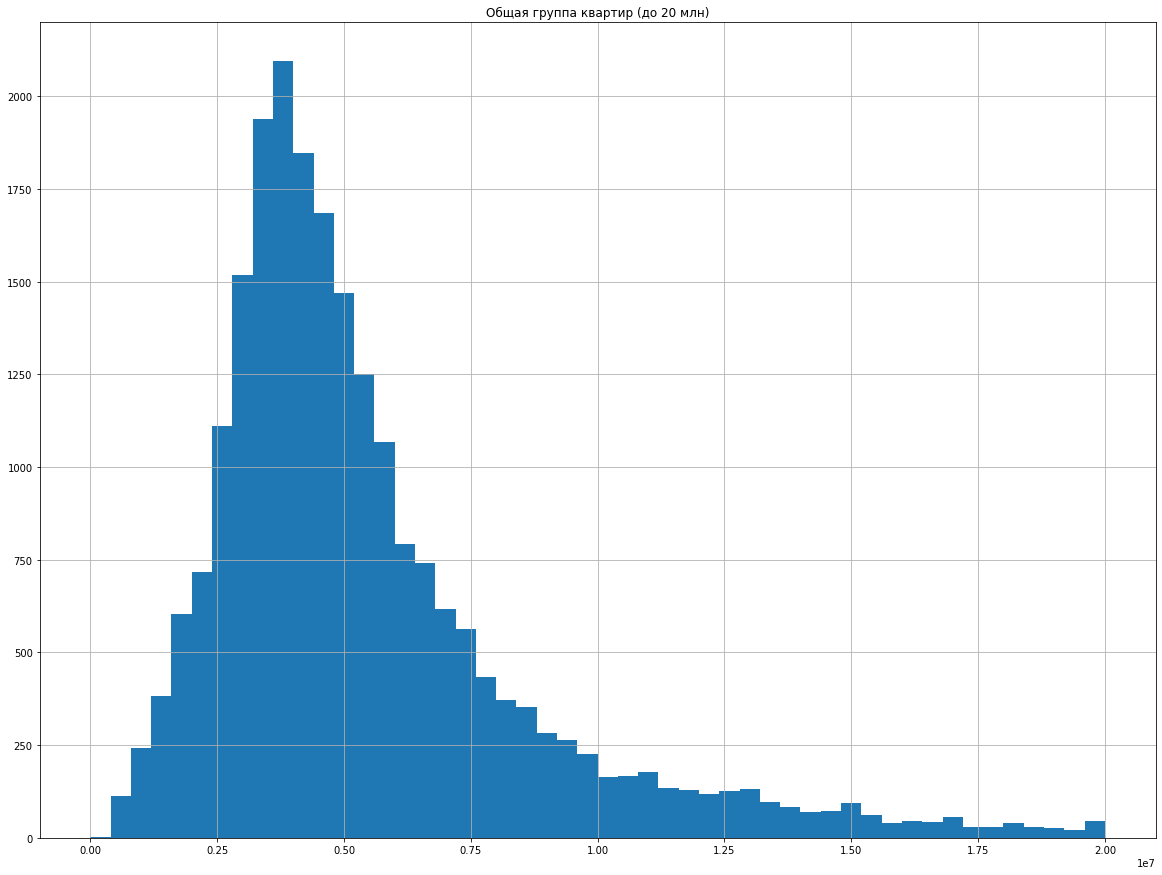

In [140]:
data['last_price'].hist(figsize=(20, 15), bins = 50, range=(0, 2*10**7))
plt.title('Общая группа квартир (до 20 млн)')

Text(0.5, 1.0, 'Дорогие квартиры (от 20 до 100 млн)')

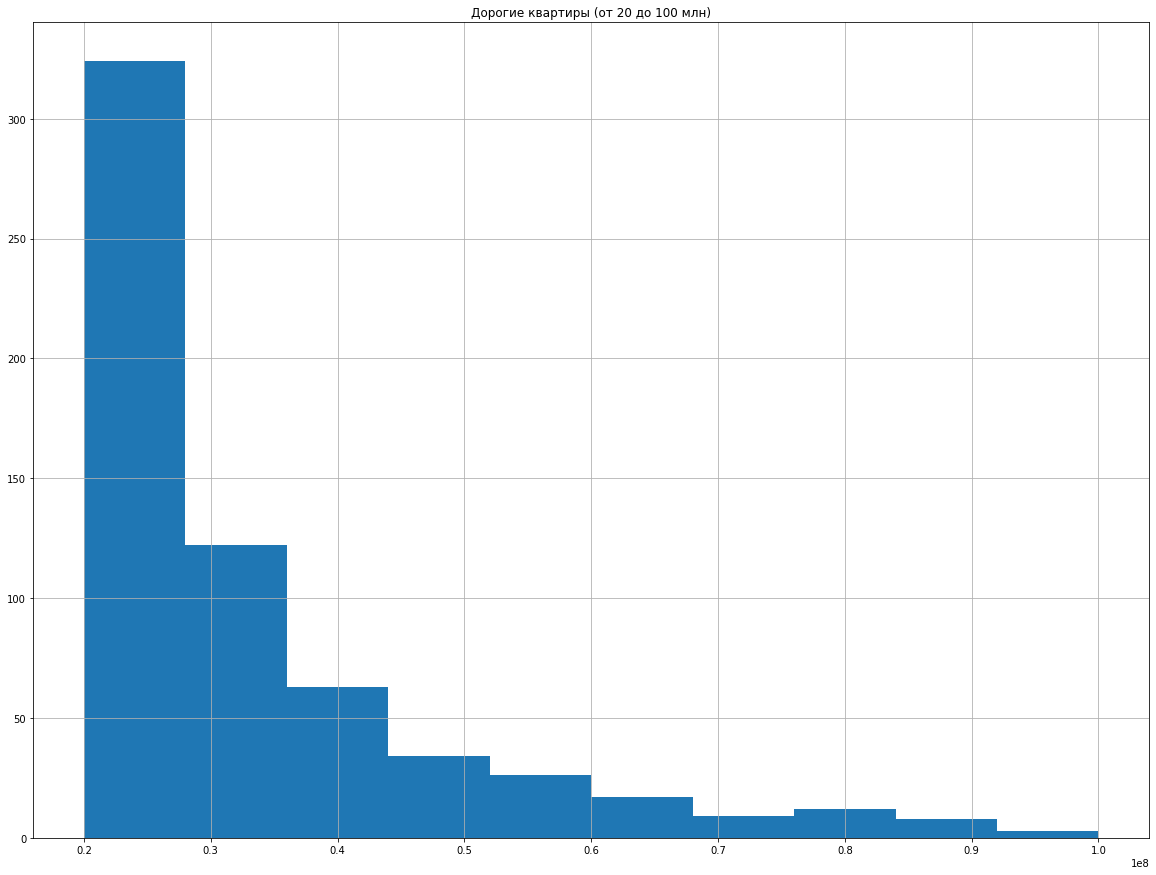

In [141]:
data['last_price'].hist(figsize=(20, 15), bins = 10, range=(2*10**7, 1*10**8))
plt.title('Дорогие квартиры (от 20 до 100 млн)')

Text(0.5, 1.0, 'Сверхдорогие квартиры (от 100 млн)')

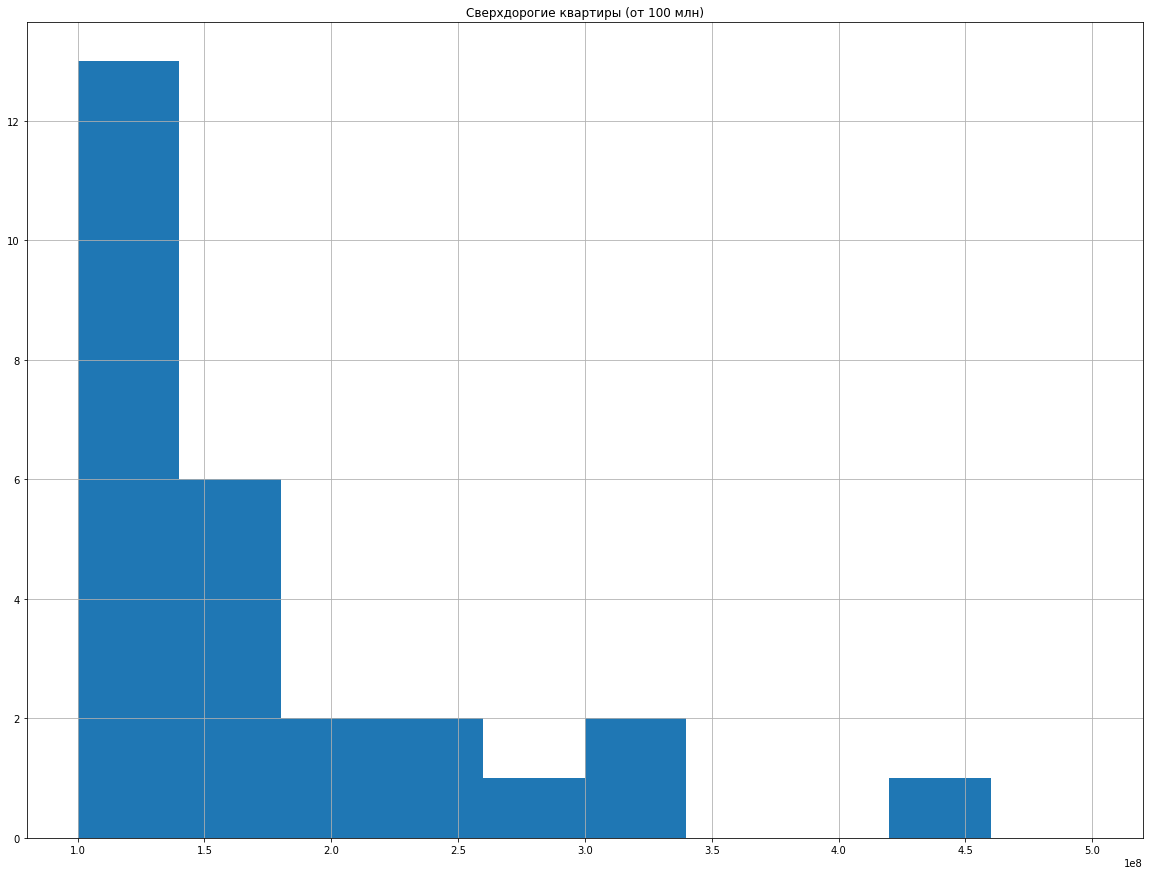

In [142]:
data['last_price'].hist(figsize=(20, 15), bins = 10, range=(1*10**8, 5*10**8))
plt.title('Сверхдорогие квартиры (от 100 млн)')

**Д. количество комнат**

In [143]:
data['rooms'].describe()

count    23344.000000
mean         2.069868
std          1.046473
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

Text(0.5, 1.0, 'Общее распределение')

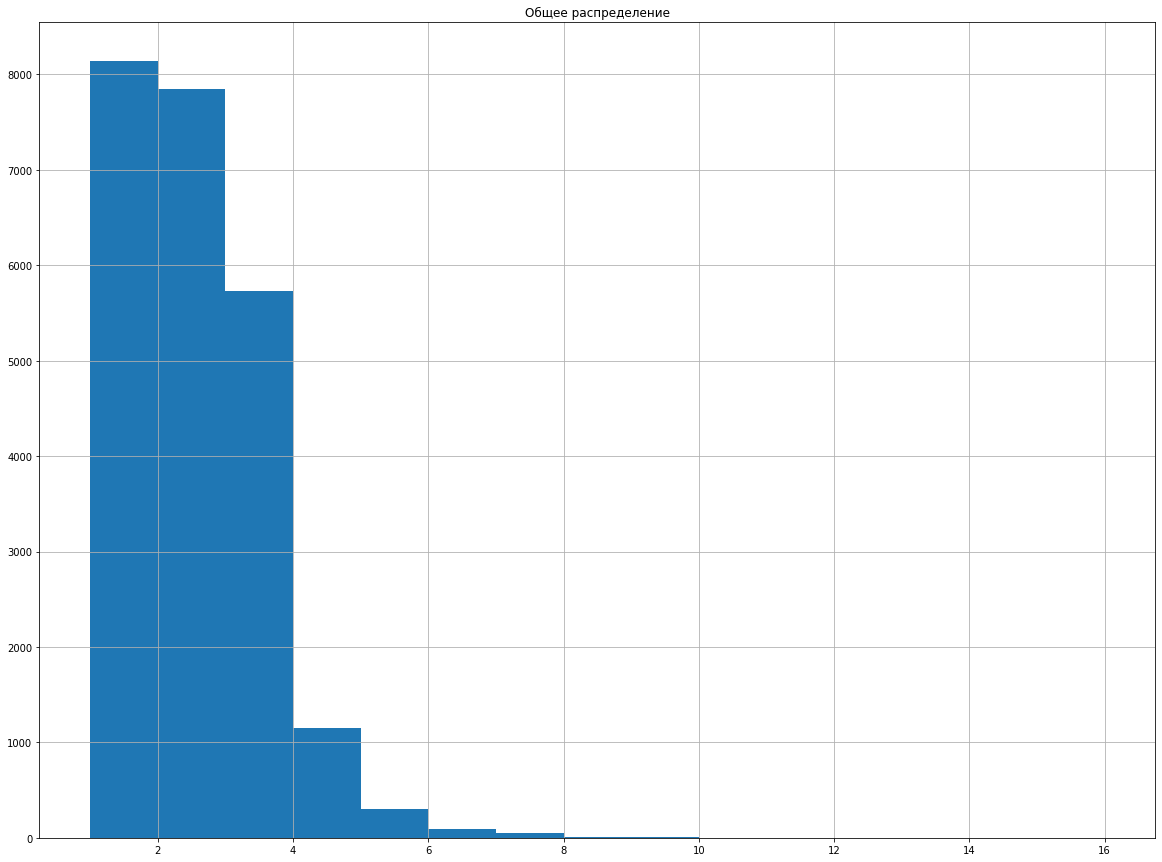

In [144]:
data['rooms'].hist(figsize=(20, 15), bins = 15)
plt.title('Общее распределение')

Text(0.5, 1.0, 'Большие квартиры (от 6 комнат)')

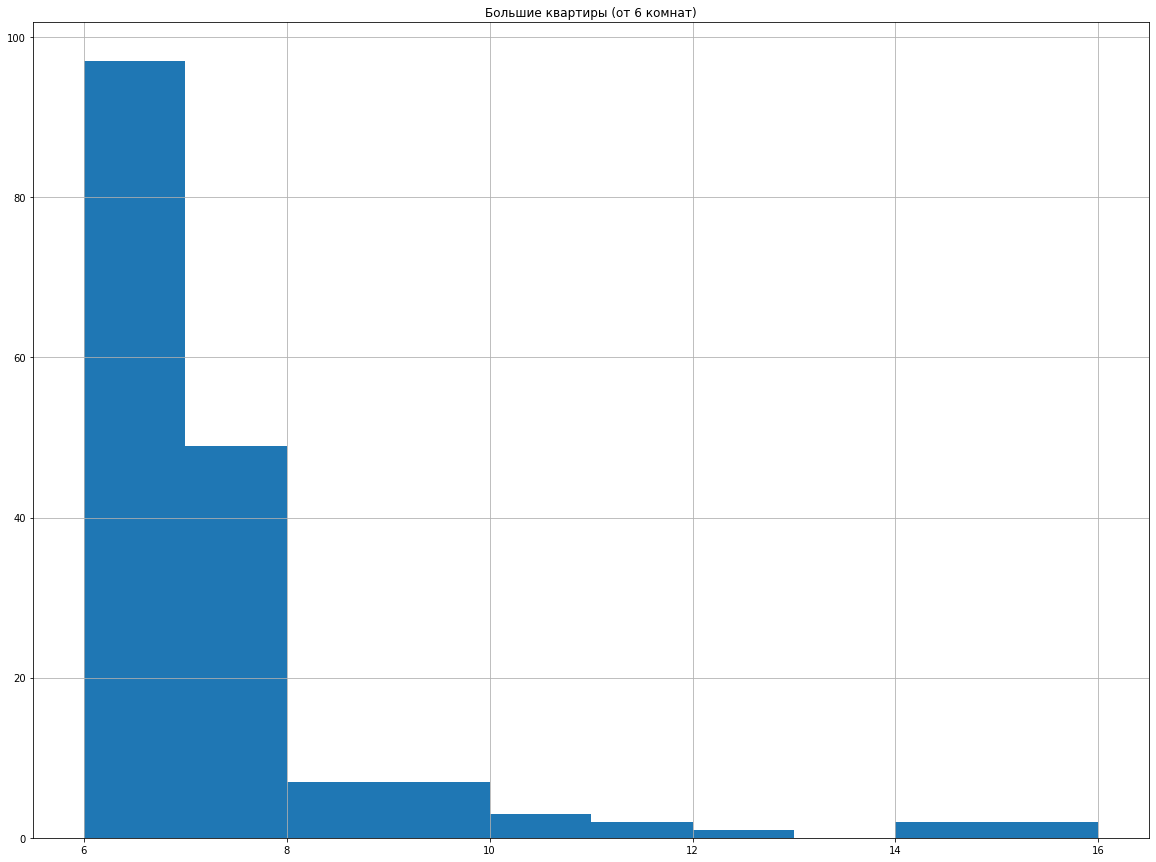

In [145]:
data['rooms'].hist(figsize=(20, 15), bins = 10, range = (6, 16))
plt.title('Большие квартиры (от 6 комнат)')

**Е. высота потолков**

In [146]:
data['ceiling_height'].describe()

count    23344.000000
mean         2.709625
std          0.254088
min          2.500000
25%          2.550000
50%          2.650000
75%          2.750000
max         10.000000
Name: ceiling_height, dtype: float64

Text(0.5, 1.0, 'Общее распределение')

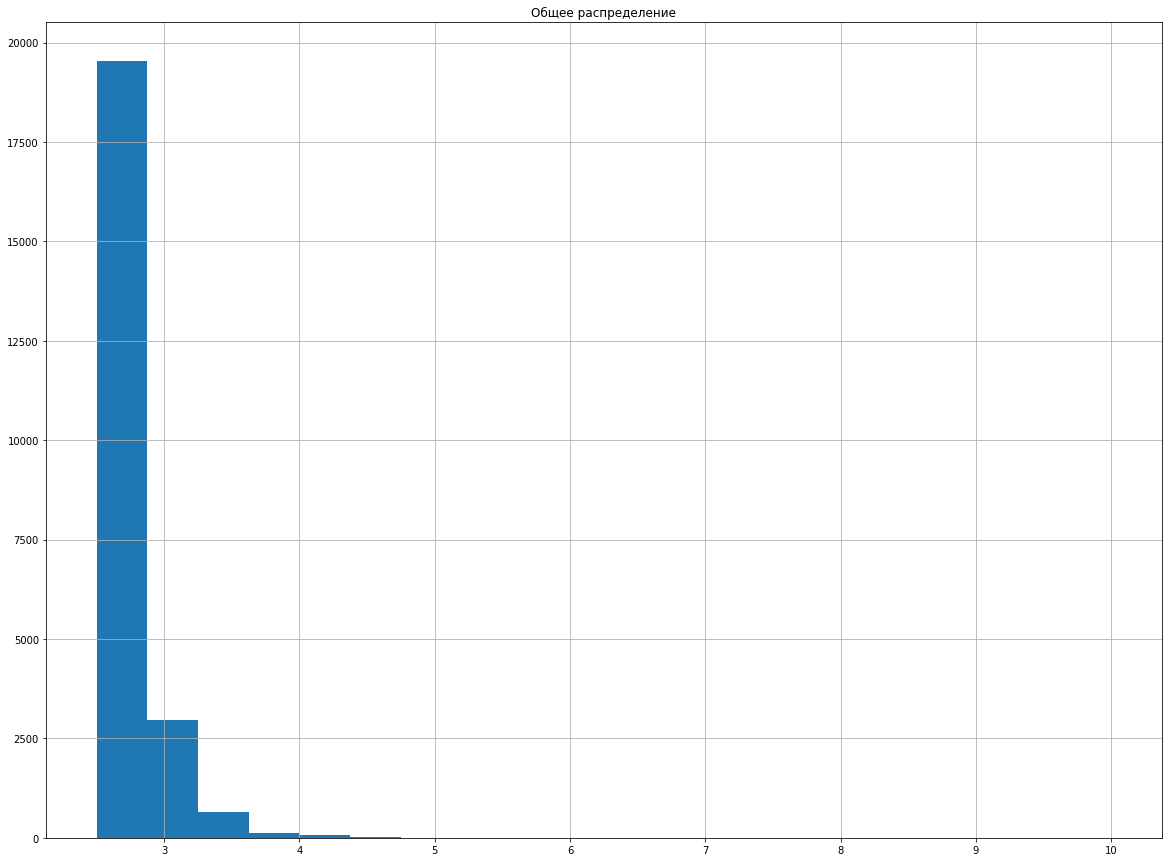

In [147]:
data['ceiling_height'].hist(figsize=(20, 15), bins = 20)
plt.title('Общее распределение')

Text(0.5, 1.0, 'Основная группа (от 2.5 до 4.5 метров)')

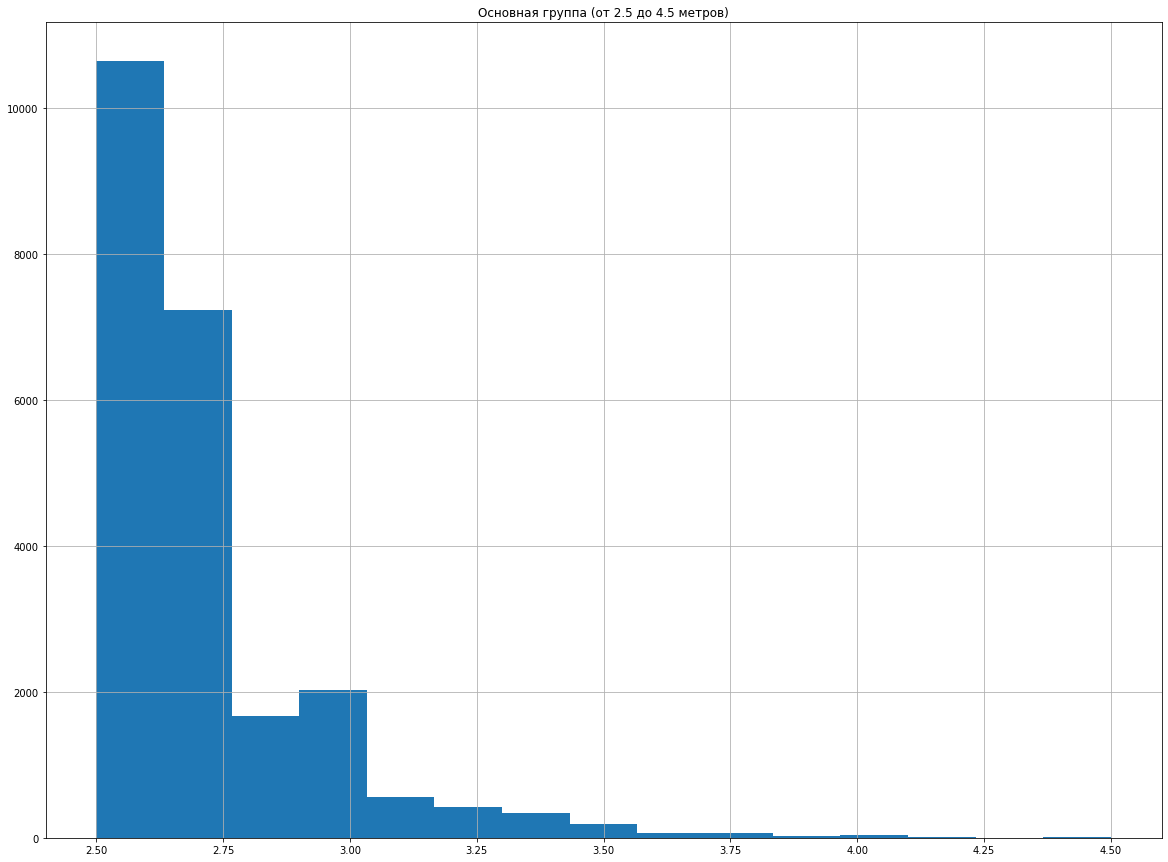

In [148]:
data['ceiling_height'].hist(figsize=(20, 15), bins = 15, range =(2.5, 4.5))
plt.title('Основная группа (от 2.5 до 4.5 метров)')

Text(0.5, 1.0, 'Высокие потолки (от 4.5 метров)')

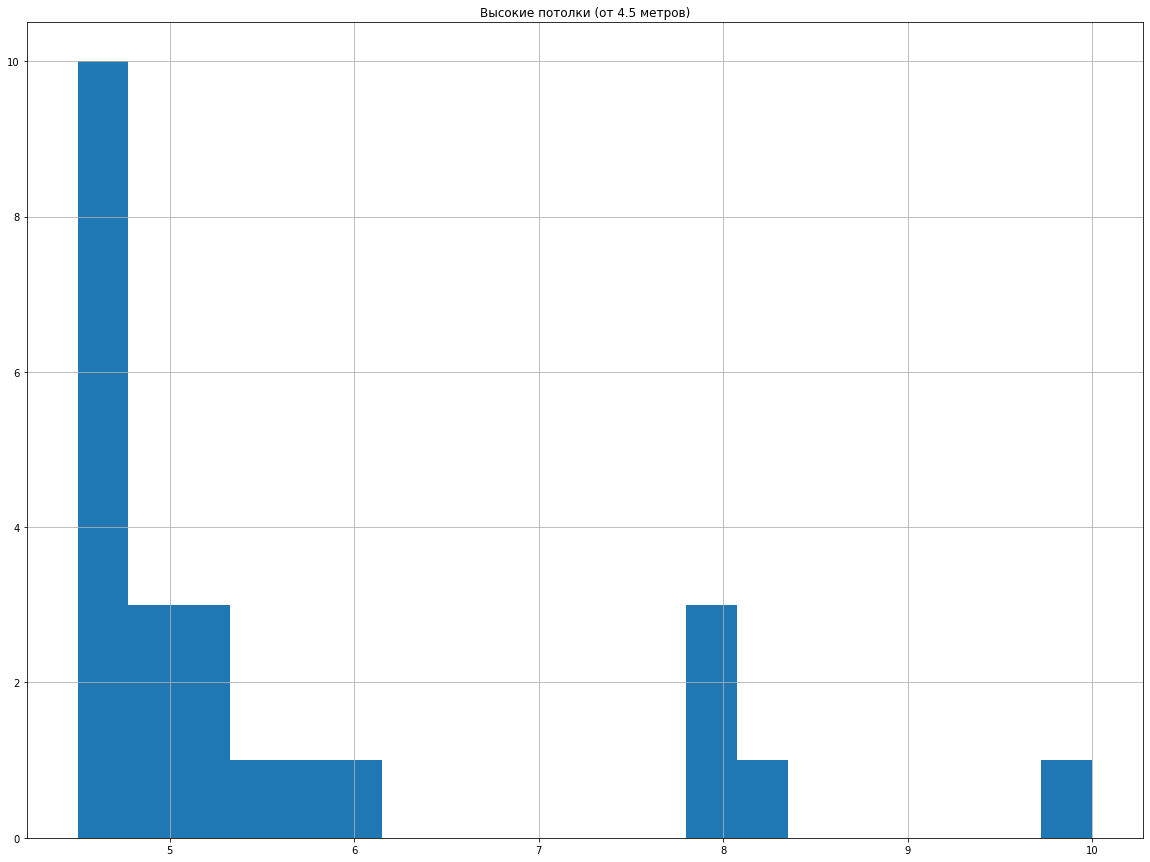

In [149]:
data['ceiling_height'].hist(figsize=(20, 15), bins = 20, range =(4.5 , 10))
plt.title('Высокие потолки (от 4.5 метров)')

**Ж. тип этажа квартиры**

In [150]:
data['floor_category'].describe()

count      23344
unique         3
top       Другой
freq       17186
Name: floor_category, dtype: object

Text(0.5, 1.0, 'Распределение значений')

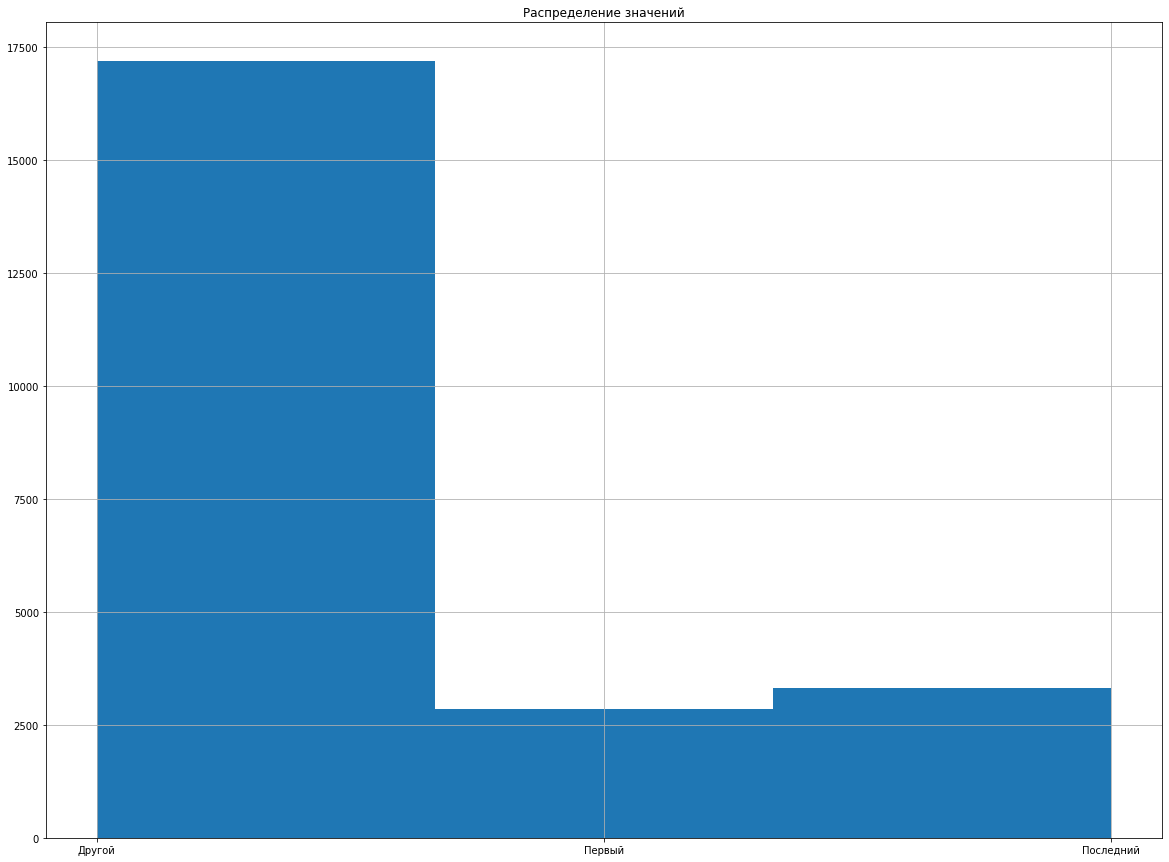

In [151]:
data['floor_category'].hist(figsize=(20, 15), bins = 3)
plt.title('Распределение значений')

**З. общее количество этажей в доме**

In [152]:
data['floors_total'].describe()

count    23344.000000
mean        10.691056
std          6.590656
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Text(0.5, 1.0, 'Общее распределение')

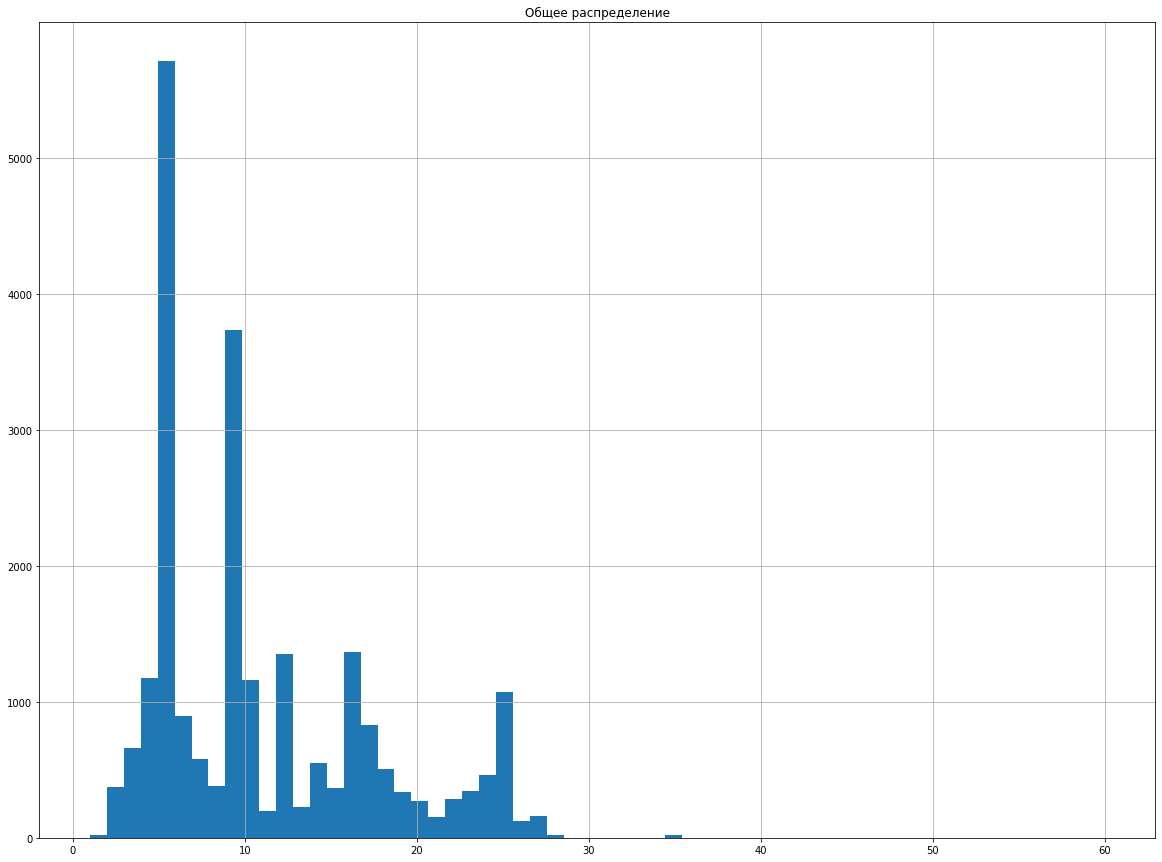

In [153]:
data['floors_total'].hist(figsize=(20, 15), bins = 60)
plt.title('Общее распределение')

Text(0.5, 1.0, 'Основная группа (до 20 этажей)')

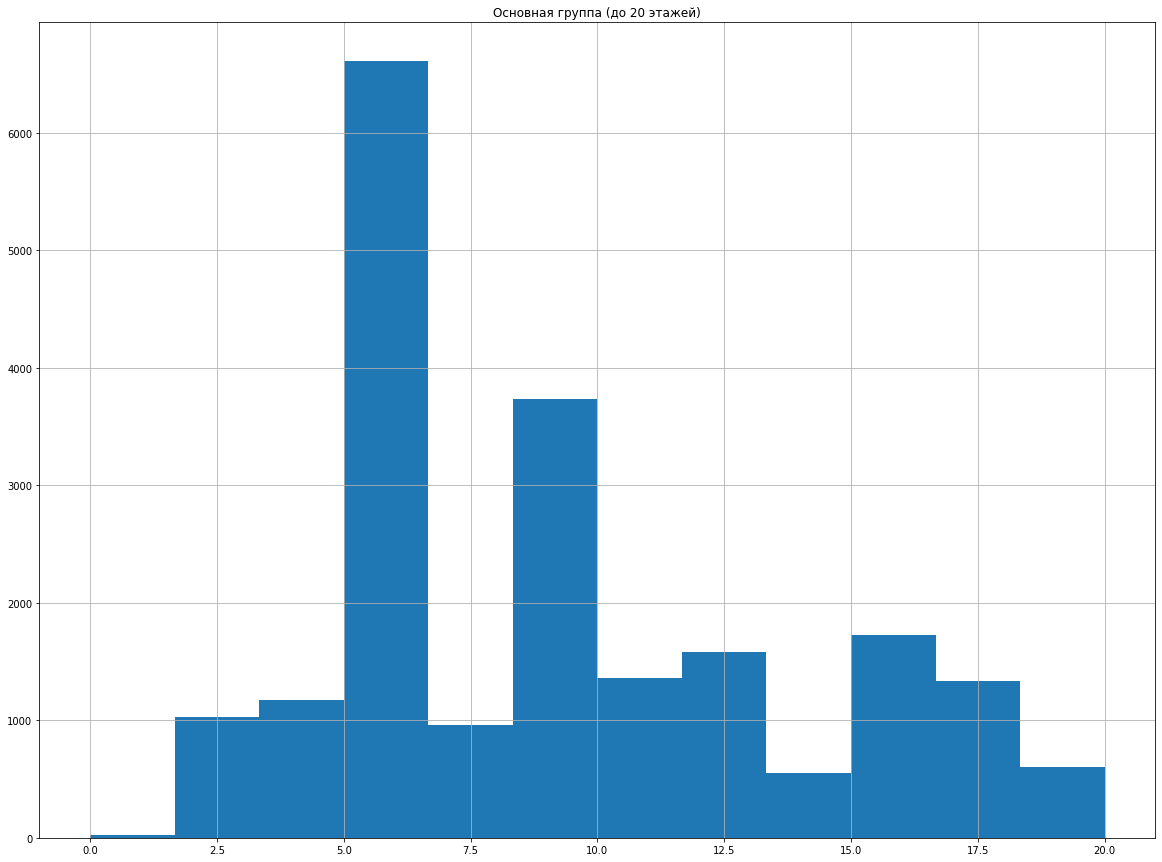

In [154]:
data['floors_total'].hist(figsize=(20, 15), bins = 12, range = (0, 20))
plt.title('Основная группа (до 20 этажей)')

Text(0.5, 1.0, 'Высокие здания (от 20 этажей)')

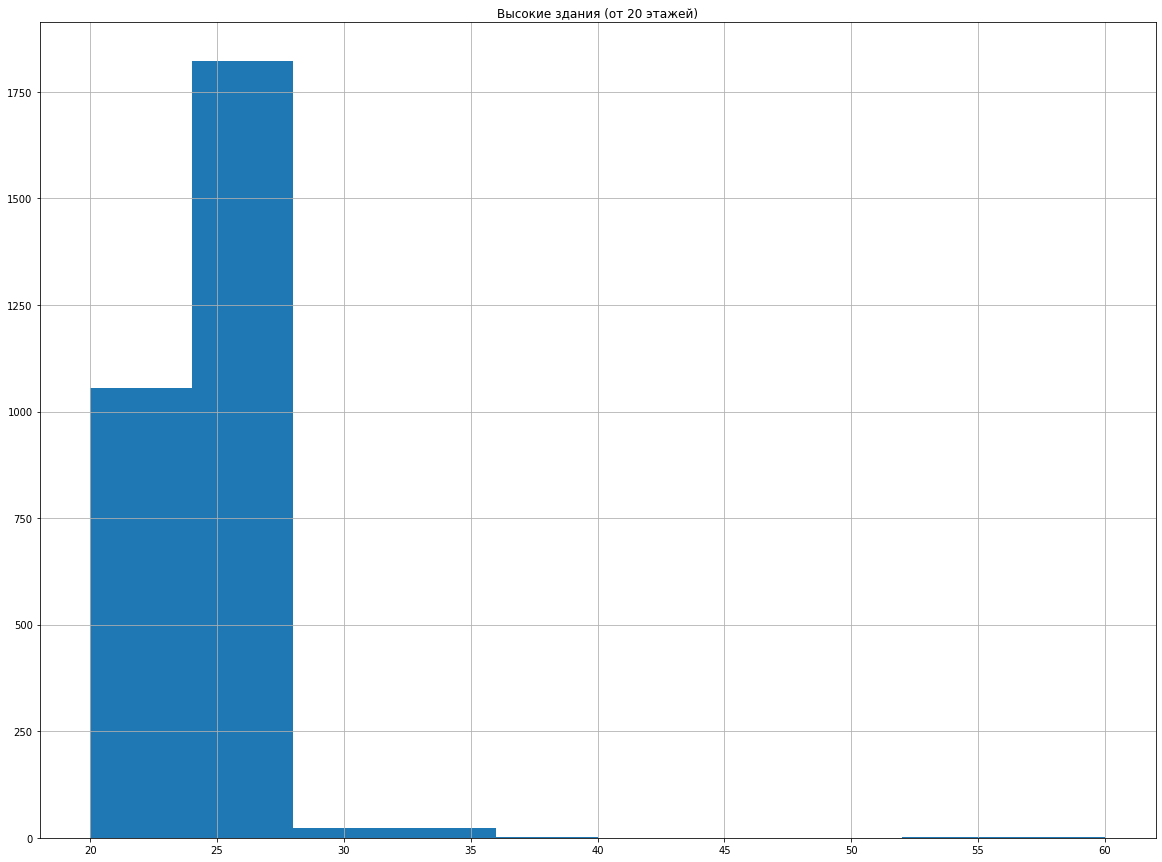

In [155]:
data['floors_total'].hist(figsize=(20, 15), bins = 10, range = (20, 60))
plt.title('Высокие здания (от 20 этажей)')

**И. расстояние до центра города в метрах**

In [156]:
data['city_сenters_nearest'].describe()

count    17951.000000
mean     14272.331709
std       8633.748580
min        181.000000
25%       9356.000000
50%      13145.000000
75%      16336.000000
max      67872.500000
Name: city_сenters_nearest, dtype: float64

Text(0.5, 1.0, 'Общее распределение')

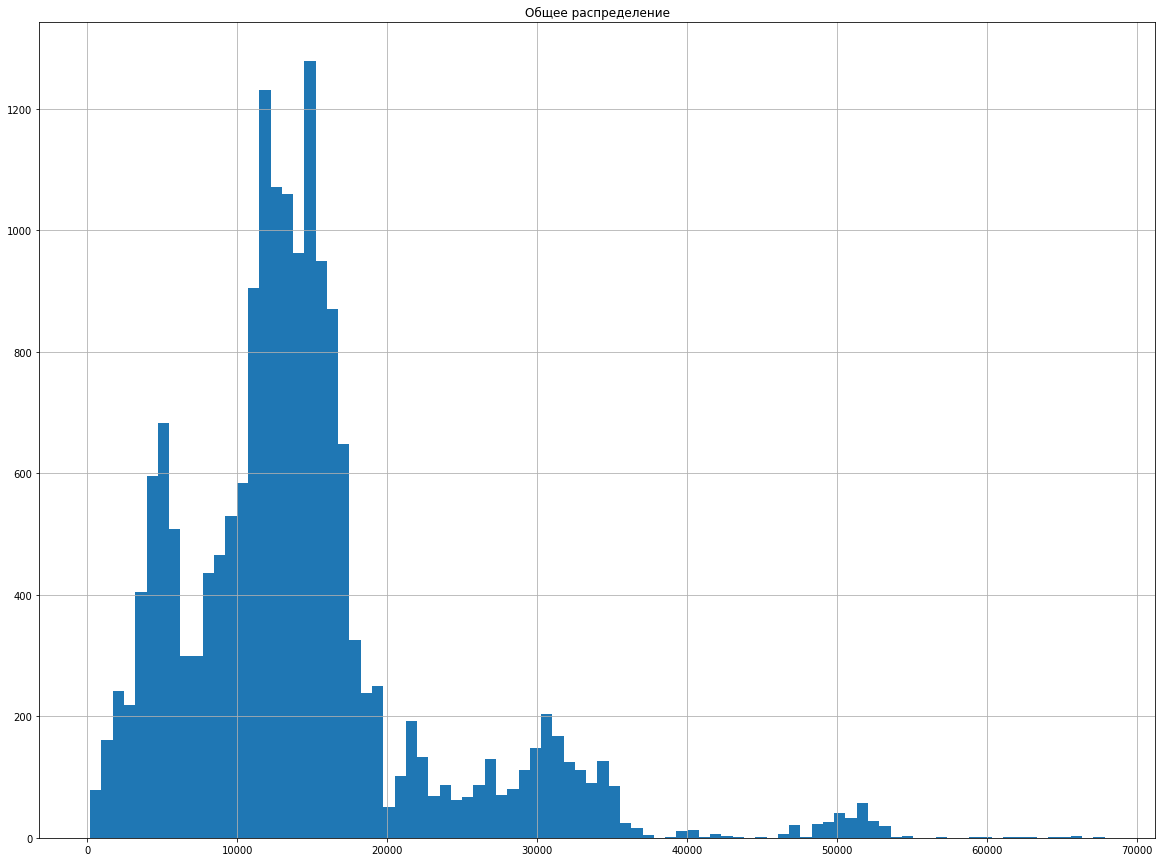

In [157]:
data['city_сenters_nearest'].hist(figsize=(20, 15), bins = 90)
plt.title('Общее распределение')

Text(0.5, 1.0, 'Близкие (до 20 км)')

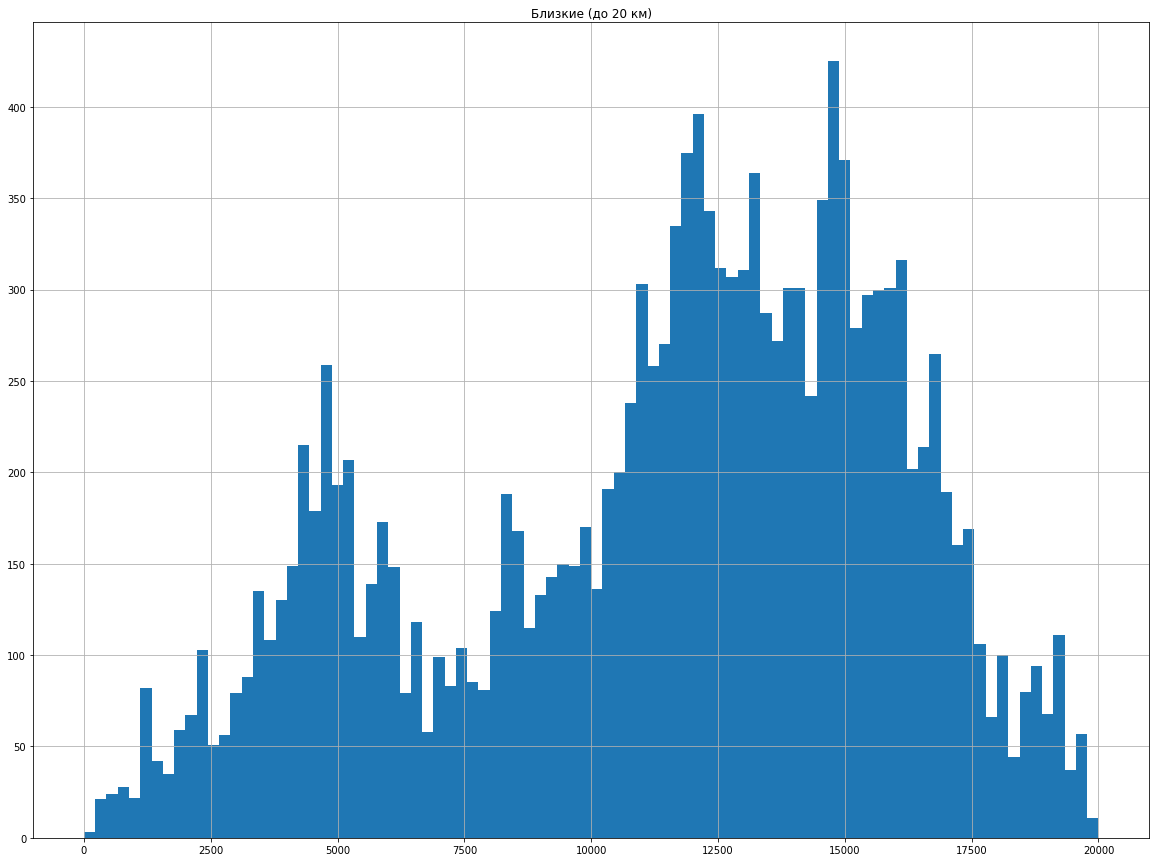

In [158]:
data['city_сenters_nearest'].hist(figsize=(20, 15), bins = 90, range = (0, 20000))
plt.title('Близкие (до 20 км)')

Text(0.5, 1.0, 'Средней дальности (от 20 до 50 км)')

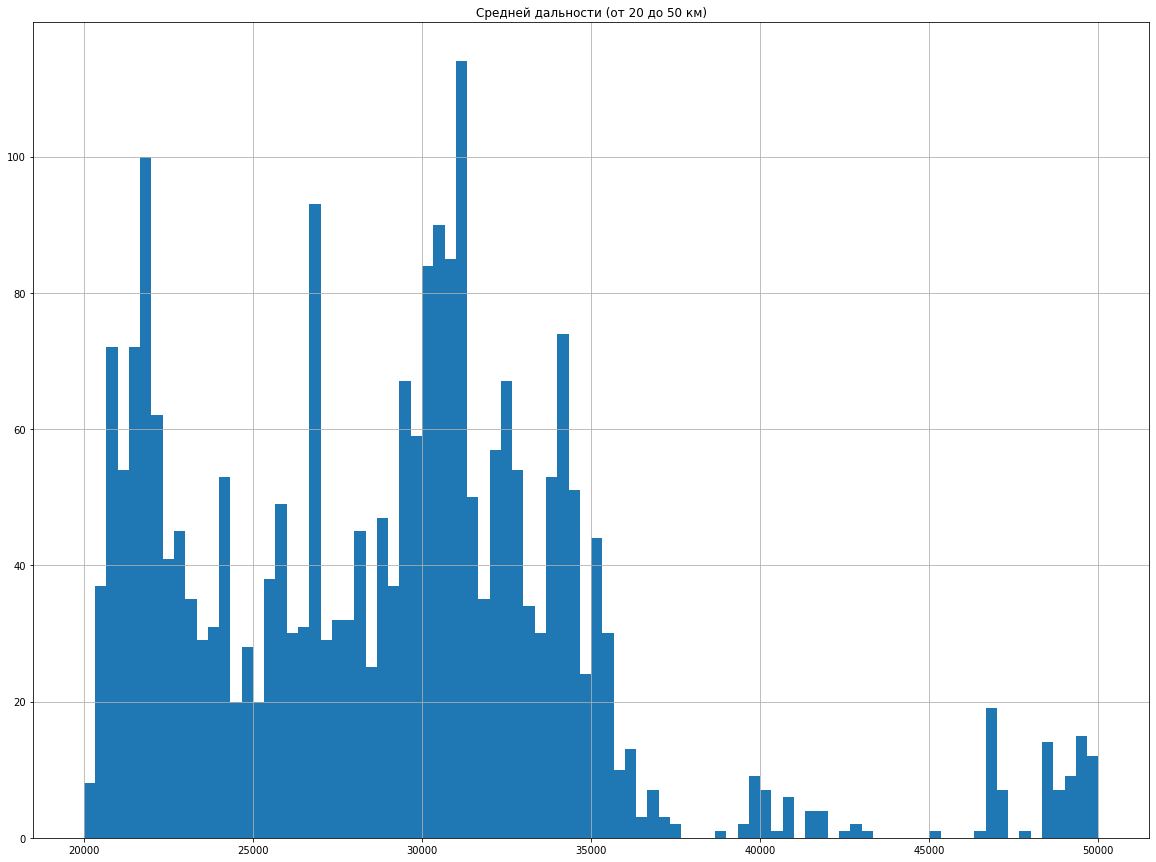

In [159]:
data['city_сenters_nearest'].hist(figsize=(20, 15), bins = 90, range = (20000, 50000))
plt.title('Средней дальности (от 20 до 50 км)')

Text(0.5, 1.0, 'Далекие (от 50 км)')

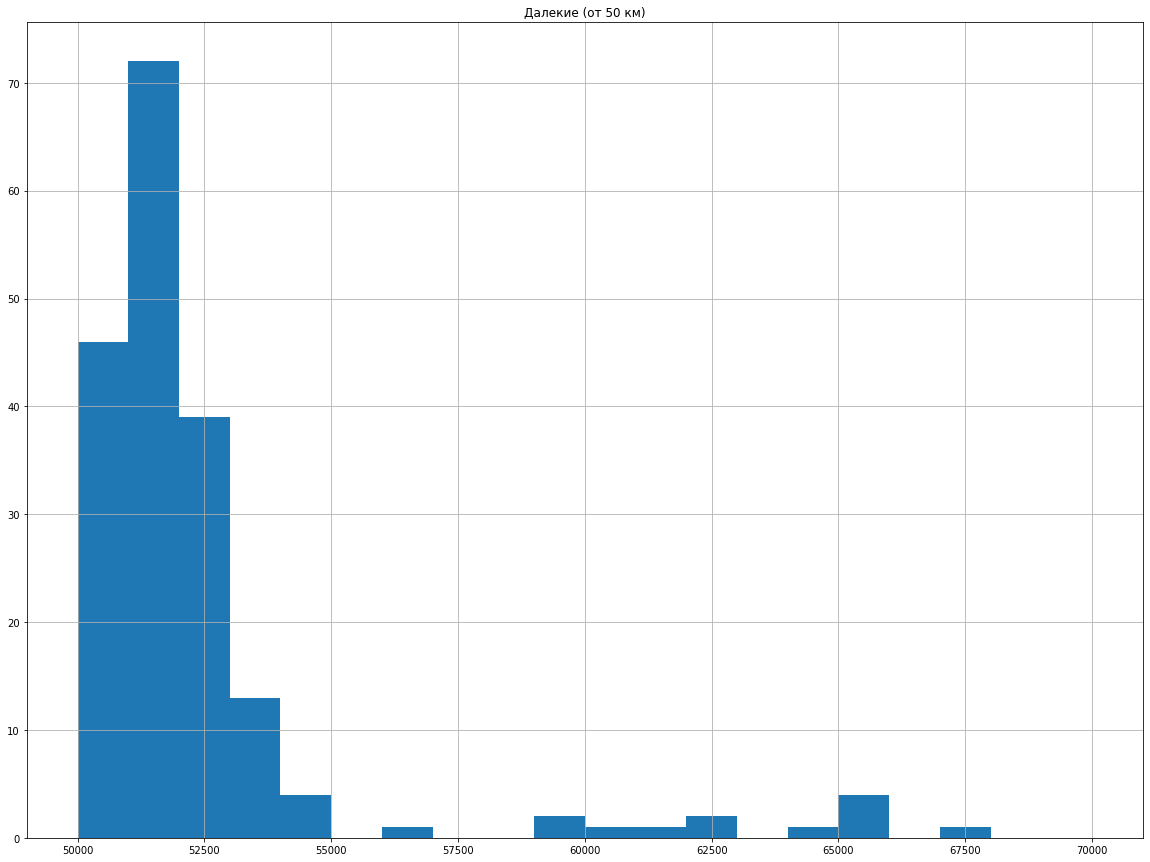

In [160]:
data['city_сenters_nearest'].hist(figsize=(20, 15), bins = 20, range = (50000, 70000))
plt.title('Далекие (от 50 км)')

**К. расстояние до ближайшего парка**

In [161]:
data['parks_nearest'].describe()

count    7924.000000
mean      490.353483
std       341.399506
min         1.000000
25%       287.750000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Text(0.5, 1.0, 'Общее распределение')

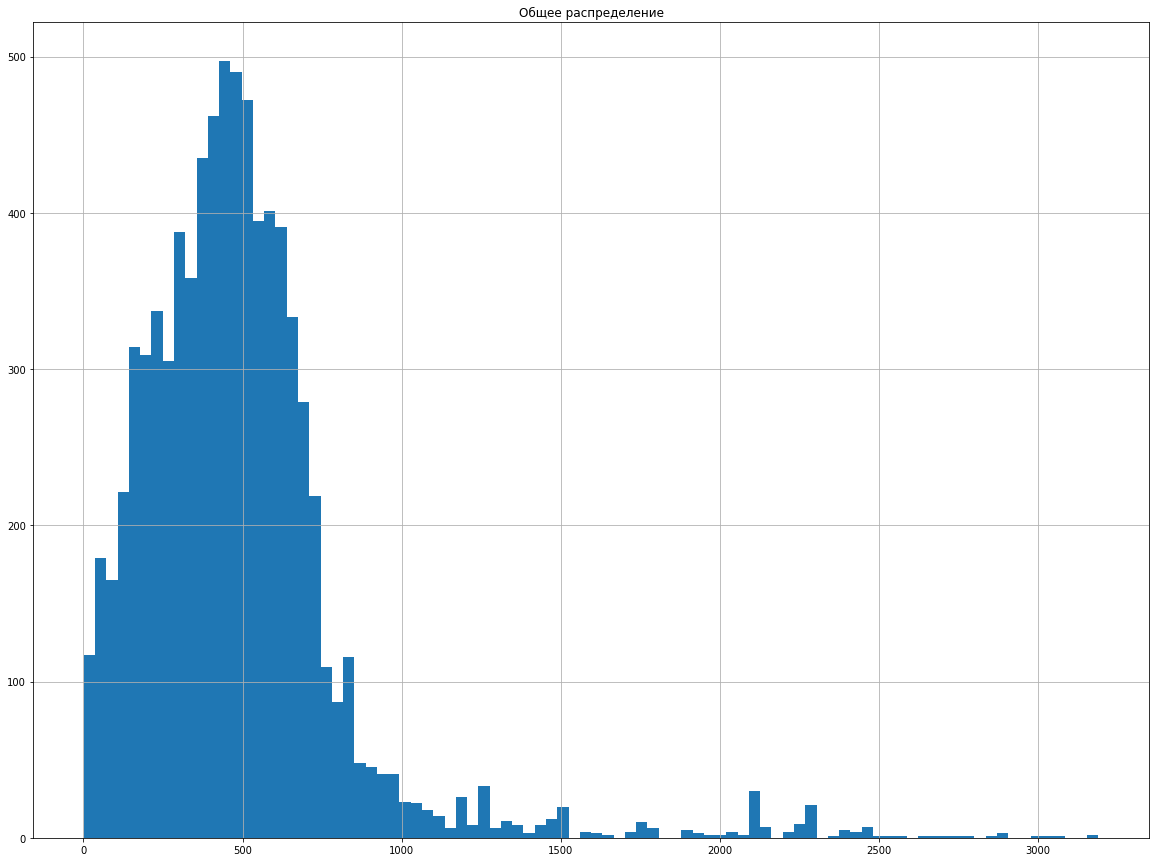

In [162]:
data['parks_nearest'].hist(figsize=(20, 15), bins = 90)
plt.title('Общее распределение')

Text(0.5, 1.0, 'Основная группа (до 1.5 км)')

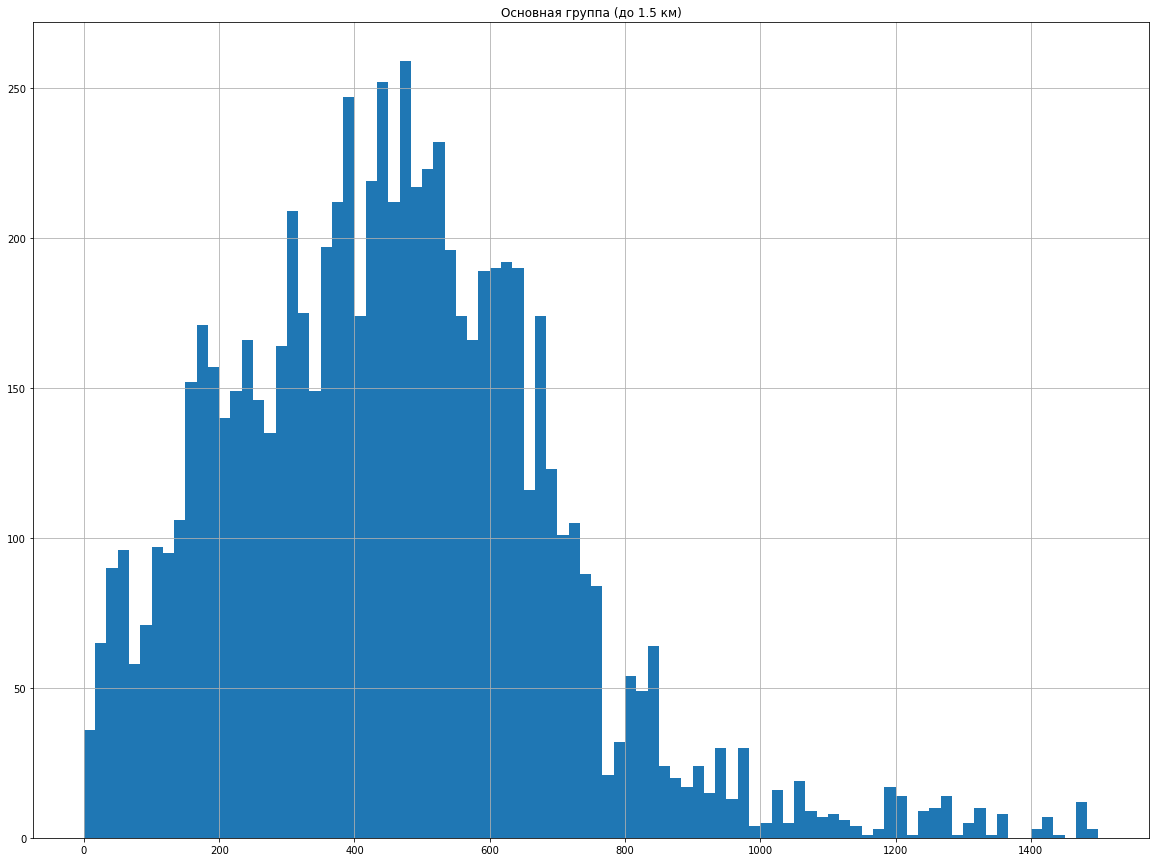

In [163]:
data['parks_nearest'].hist(figsize=(20, 15), bins = 90, range = (0, 1500))
plt.title('Основная группа (до 1.5 км)')

Text(0.5, 1.0, 'Парк далеко (от 1.5 км)')

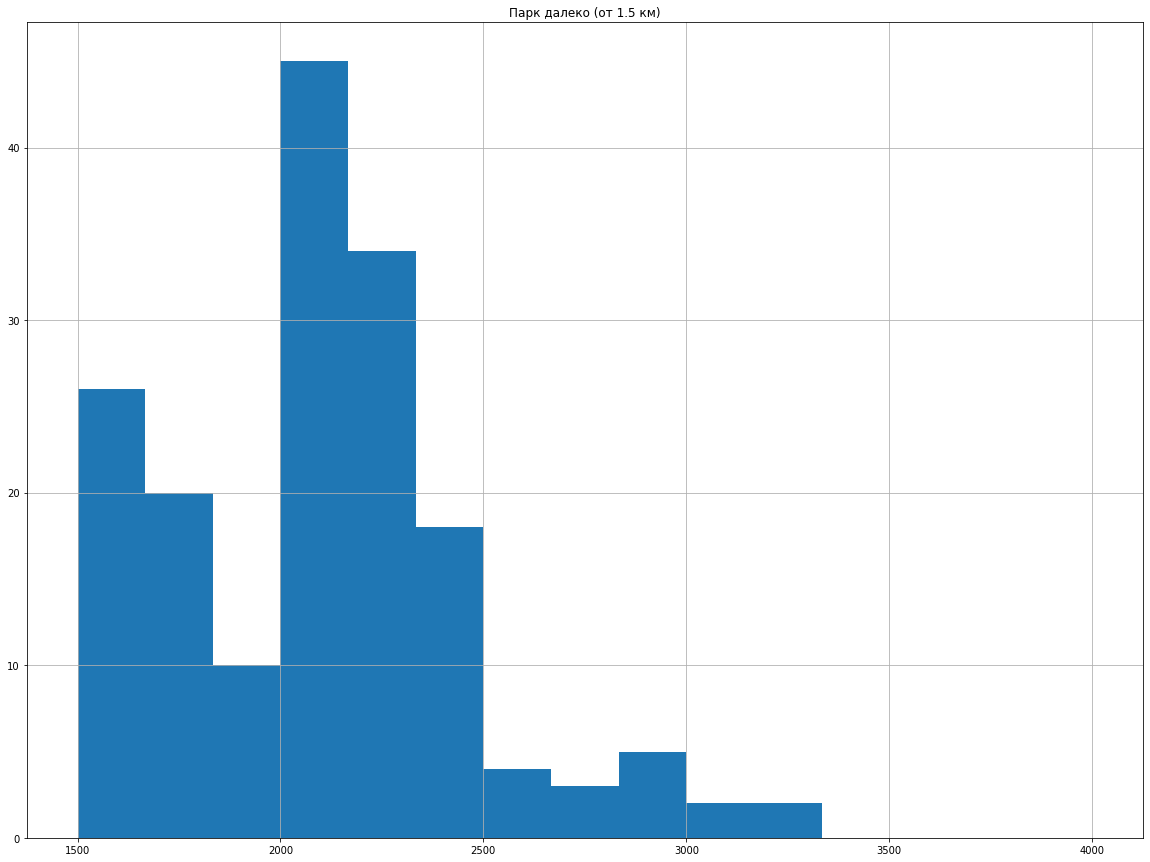

In [164]:
data['parks_nearest'].hist(figsize=(20, 15), bins = 15, range = (1500, 4000))
plt.title('Парк далеко (от 1.5 км)')

**Выводы**

Все представленные значения, рассматриваемые в этом пункте, распределены по закону Пуассона (с учетом погрешности). Исходя из этого вывода можно сказать, что значения распределены естественным образом

В некоторых случаях при отрезании хвоста, содержащего большие значения, распределение можно привести к нормальному

#### Изучение скорости продажи квартиры

Рассмотрим базовые статистические параметры и график распределения значений

In [165]:
data['days_exposition'].describe()

count    23344.000000
mean       156.389136
std        213.330357
min          0.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

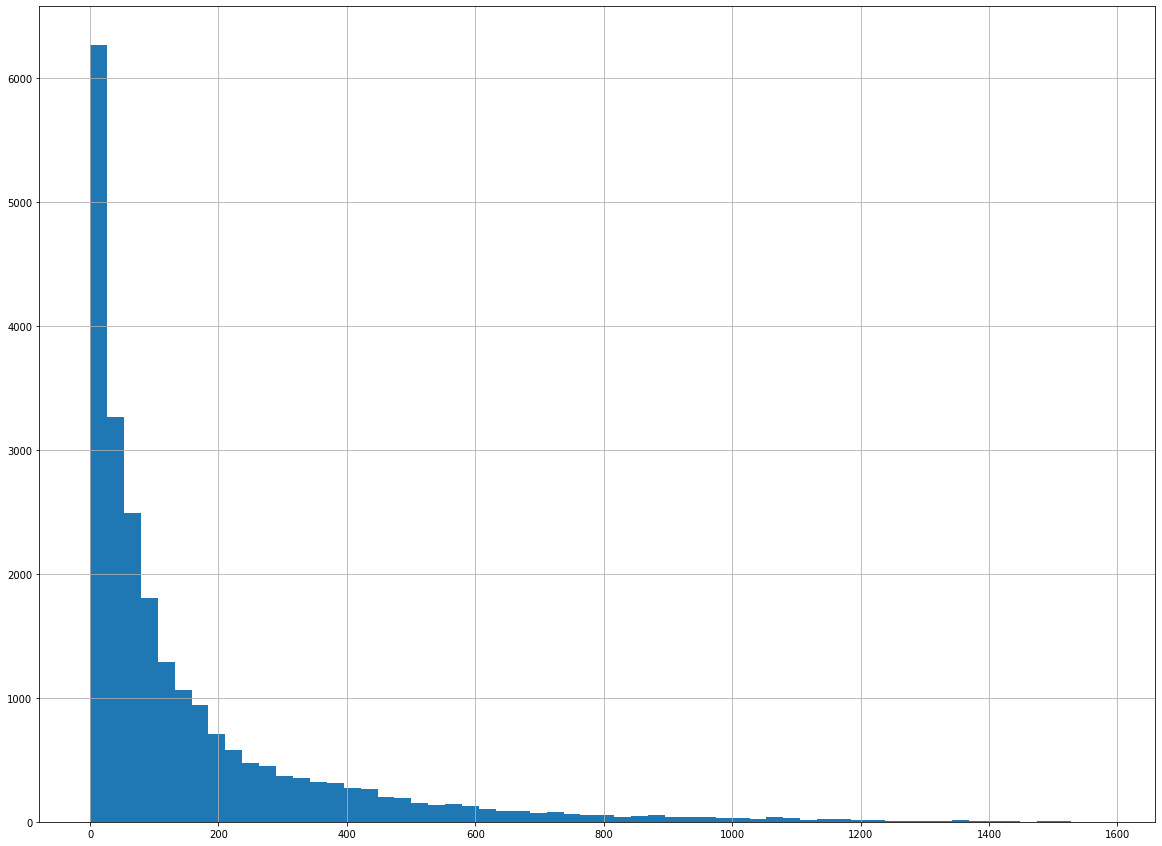

In [166]:
data['days_exposition'].hist(bins = 60, figsize = (20, 15))

In [167]:
data['days_exposition'].median()

73.0

In [168]:
data['days_exposition'].mean()

156.38913639479097

In [169]:
#95% - значения, которые можно назвать "медленными"
#80% - знчаения, котррый можно назвать "медленее обычных"
for i in range(200, 1600):
    if abs(len(data.query('days_exposition < @i'))/len(data['days_exposition']) - 0.95) <=0.001:
        print(i, 0.95)
    if abs(len(data.query('days_exposition < @i'))/len(data['days_exposition']) - 0.80) <=0.001:
        print(i, 0.80)

250 0.8
251 0.8
252 0.8
599 0.95
600 0.95
601 0.95
602 0.95
603 0.95
604 0.95
605 0.95
606 0.95
607 0.95
608 0.95


Для определения среднего времени продажи можно использовать квартили, указанные в описании статистических параметров. Для усредненного времени продажи можно использовать второй квартиль или медиану, но я предлагаю рассмотреть среднее значение, так как оно ниже третьего квартиля и обозначает, что примерно 65% квартир было продано быстрее, чем за 156 дней (5 месяцев)

**Тогда можно получить следующую классификацию:**

Сверхбыстрые - первый квартиль - до 22 дней

Быстрые - второй квартиль - до 73 дней

Стандартные - среднее значение - до 156 дней 

Медленнее стандартных - больше, чем 80% значений - до 252 дней

Медленные - больше, чем 95% значений - до 608 дней

Аномально медленные - до 1580 дней

#### Определение факторов, влияющих на стоимость квартиры

В данном пункте мы сначала рассмотрим коэффиценты корреляции цены с параметрами, далее мы рассмотрим scatter_plot графики для количественных параметров и bar_plot для категоральных значений

**Коэффиценты корреляции**

In [170]:
data.corr()['last_price'].sort_values(ascending = False)

last_price              1.000000
price_for_m             0.735115
total_area              0.701626
living_area             0.612117
kitchen_area            0.539646
rooms                   0.399469
ceiling_height          0.391902
ponds_around_3000       0.233274
parks_around_3000       0.227011
total_images            0.119793
days_exposition         0.058931
is_apartment            0.035330
floor                   0.027945
balcony                 0.007706
exposition_month        0.003041
floors_total           -0.001315
exposition_day         -0.014793
open_plan              -0.019687
parks_nearest          -0.020654
studio                 -0.028370
airports_nearest       -0.029083
exposition_year        -0.040794
ponds_nearest          -0.103013
center_distance_km     -0.229529
city_сenters_nearest   -0.229639
Name: last_price, dtype: float64

**Рассмотрение количественных параметров**

**total_area**

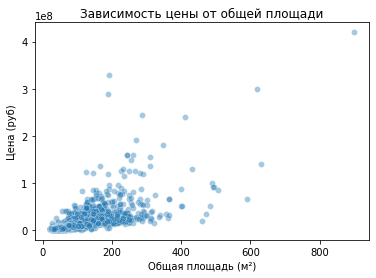

In [171]:
sb.scatterplot(data=data, x='total_area', y='last_price', alpha=0.4)
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь (м²)')
plt.ylabel('Цена (руб)')
plt.show()

По данной матрице рассеивания можно сделать первичный вывод, что с ростом площади на объект недвижимости растет и его цена, но я предлагаю рассмотреть ближе, уменьшив ценовой диапазон с 0-500млн до 0-50млн

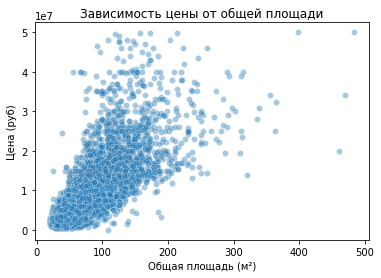

In [172]:
sb.scatterplot(data=data.query('last_price < 5*10**7'), x='total_area', y='last_price', alpha=0.4)
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь (м²)')
plt.ylabel('Цена (руб)')
plt.show()

На данной матрице мы уже можем однозначно сказать, что тенденция значений стремится к кореляции = 1. По этому можем сделать вывод, что с ростом площади объекта растет и его стоимость

**living_area**

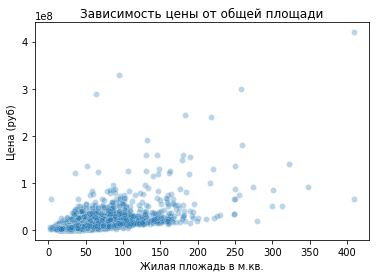

In [173]:
sb.scatterplot(data=data, x='living_area', y='last_price', alpha=0.3)
plt.title('Зависимость цены от общей площади')
plt.xlabel('Жилая пложадь в м.кв.')
plt.ylabel('Цена (руб)')
plt.show()

Аналогично с предыдущим пунктом, по данной матрице рассеивания можно сделать первичный вывод, что с ростом жилой площади на объект недвижимости растет и его цена, но я предлагаю рассмотреть ближе, уменьшив диапазон цен

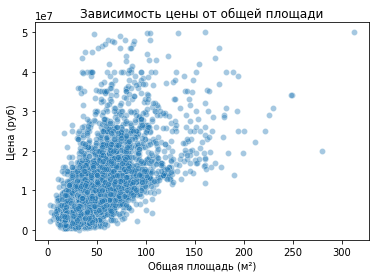

In [174]:
sb.scatterplot(data=data.query('last_price < 5*10**7'), x='living_area', y='last_price', alpha=0.4)
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь (м²)')
plt.ylabel('Цена (руб)')
plt.show()

На данной матрице мы уже можем однозначно сказать, что тенденция значений стремится к кореляции = 1. По этому можем подтвердить вывод, что с ростом жилой площади объекта растет и его стоимость

**kitchen_area**

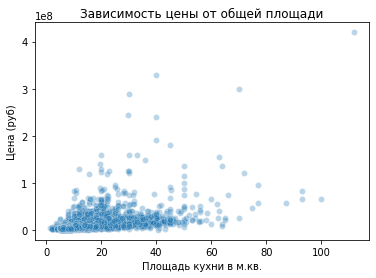

In [175]:
sb.scatterplot(data=data, x='kitchen_area', y='last_price', alpha=0.3)
plt.title('Зависимость цены от общей площади')
plt.xlabel('Площадь кухни в м.кв.')
plt.ylabel('Цена (руб)')
plt.show()

Аналогично с предыдущими пунктами, по данной матрице рассеивания можно сделать первичный вывод, что с ростом площади кухни объекта недвижимости растет и его цена, но я предлагаю рассмотреть ближе, уменьшив диапазон цен

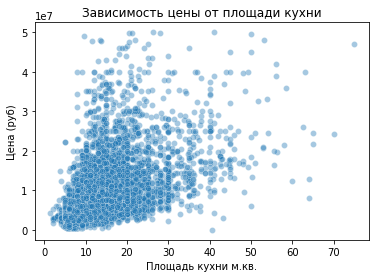

In [176]:
sb.scatterplot(data=data.query('last_price < 5*10**7'), x='kitchen_area', y='last_price', alpha=0.4)
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни м.кв.')
plt.ylabel('Цена (руб)')
plt.show()

По данной матрице рассеивания можно сделать вывод, что у цены наблюдается тенденция: она растет совместно с ростом площади кухни, но данный параметр отличается от предыдущих, потому что корреляция не столь явна и значения шире распределены

**Рассмотрение категоральных параметров**

**Количество комнат**

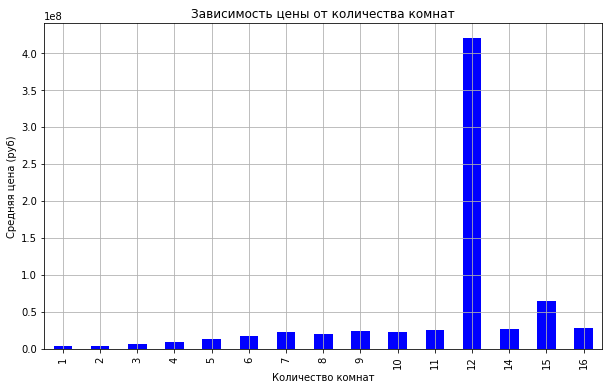

In [177]:
#Создаем переменную, содержащую количество комнат - среднюю цену за объект с этим количесвтом комнат
price_by_room = data.groupby('rooms')['last_price'].median()

#Строим график для визуального анализа распредения
price_by_room.plot(kind='bar', figsize=(10, 6), color='b')

plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена (руб)')
plt.title('Зависимость цены от количества комнат')
plt.grid(True)

По этому распределению можно сделать вывод, что количество комнат напряму влияет на цену объекта. Это можно явно пронаблюдать на протяжении всего графика с небольшим снижением в области 8 комнат и с значительными скачками стоимости на 12-тикомнатные и 15-тикомнатные квартиры. Возможно это связано с отдалением от центра или иным параметром (в центре СПб много зданий имперской постройки с огромными квартирами)

**Тип этажа**

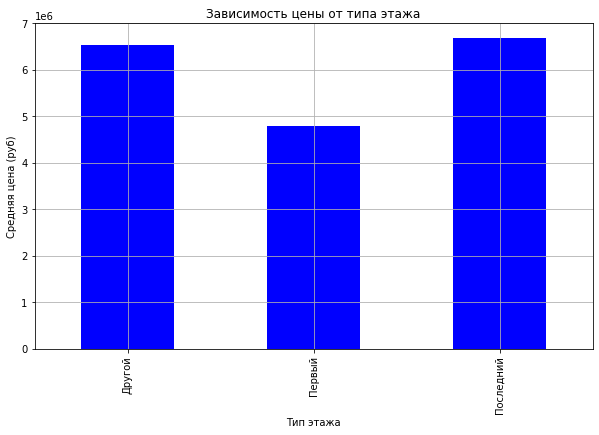

In [178]:
#Создаем переменную, содержащую тип этажа - среднюю цену за объект с этим типом этажа
price_by_floor = data.groupby('floor_category')['last_price'].mean()

#Строим график для визуального анализа распредения
price_by_floor.plot(kind='bar', figsize=(10, 6), color='b')

plt.xlabel('Тип этажа')
plt.ylabel('Средняя цена (руб)')
plt.title('Зависимость цены от типа этажа')
plt.grid(True)

По данному распределению можно сделать вывод, что пользователям наименее интересны квартиры на первом этаже, а квартиры на последнем этаже представляют для них наибольший интерес. Однако при рассмотрении этих данных стоит учитывать, что квартир с типом этажа - другой - много больше, чем всех остальных

**Дата размешения**

По дню

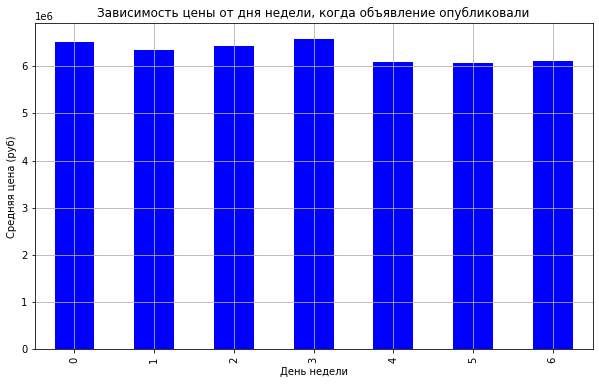

In [179]:
#Создаем переменную, содержащую день недели - среднюю цену за объект, опубликованный в этот день
price_by_day = data.groupby('exposition_day')['last_price'].mean()

#Строим график для визуального анализа распредения
price_by_day.plot(kind='bar', figsize=(10, 6), color='b')

plt.xlabel('День недели')
plt.ylabel('Средняя цена (руб)')
plt.title('Зависимость цены от дня недели, когда объявление опубликовали')
plt.grid(True)

По данному распределению можно сделать закономерный вывод, что день недели никак не влияет на стоимость объекта, потому что все средние значения нахоятся в одном интервале

По месяцу

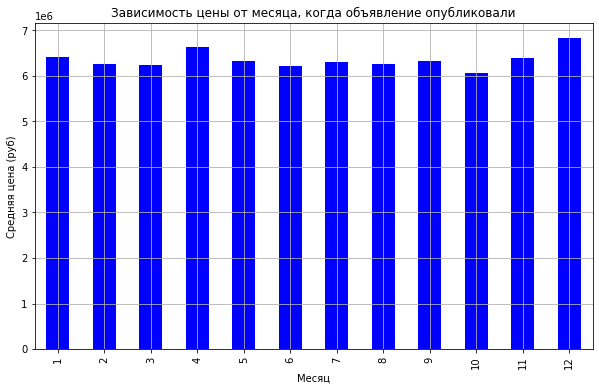

In [180]:
#Создаем переменную, содержащую месяц - среднюю цену за объект, опубликованный в этом месяце
price_by_month = data.groupby('exposition_month')['last_price'].mean()

#Строим график для визуального анализа распредения
price_by_month.plot(kind='bar', figsize=(10, 6), color='b')

plt.xlabel('Месяц')
plt.ylabel('Средняя цена (руб)')
plt.title('Зависимость цены от месяца, когда объявление опубликовали')
plt.grid(True)

По данному распределению также можно сделать закономерный вывод, что месяц публикации никак не влияет на стоимость объекта, потому что все средние значения нахоятся в одном интервале

По году

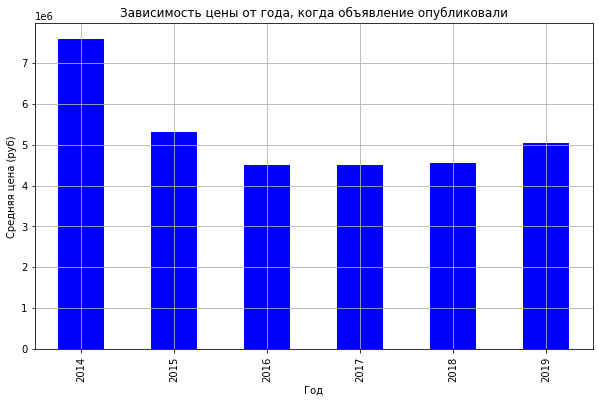

In [181]:
#Создаем переменную, содержащую год - среднюю цену за объект, опубликованный в этом году
price_by_year = data.groupby('exposition_year')['last_price'].median()

#Строим график для визуального анализа распредения
price_by_year.plot(kind='bar', figsize=(10, 6), color='b')

plt.xlabel('Год')
plt.ylabel('Средняя цена (руб)')
plt.title('Зависимость цены от года, когда объявление опубликовали')
plt.grid(True)

На данном распределении мы можем сделать вывод, что в 2014 году средняя цена недвижимости была максимальной. Дальнейшее снижение цены можно объяснить финансовым кризисом, запустившемся в конце 2014 года и развившемся в 2016 году, который повлиял на покупательную способность населения и курс валют

#### Средняя цена квадратного метра для 10 самых наполненных населенных пунктов

In [182]:
data_by_locality = data.pivot_table(index ='locality_name', values = 'last_price', aggfunc ='count')
data_by_locality

,last_price
locality_name,
бокситогорск,16
волосово,36
волхов,110
всеволожск,396
выборг,235
...,...
сосновый бор,84
сясьстрой,22
тихвин,48


In [183]:
data_by_locality['mean_price_for_m'] = data.groupby('locality_name')['price_for_m'].mean()
data_by_locality

,last_price,mean_price_for_m
locality_name,,
бокситогорск,16,17551.591819
волосово,36,40183.325974
волхов,110,35084.344735
всеволожск,396,68768.252761
выборг,235,58238.143141
...,...,...
сосновый бор,84,74927.707167
сясьстрой,22,34080.810871
тихвин,48,39991.714585


In [184]:
data_by_locality.columns = ['count_of_objects', 'mean_price_for_m']
data_by_locality

,count_of_objects,mean_price_for_m
locality_name,,
бокситогорск,16,17551.591819
волосово,36,40183.325974
волхов,110,35084.344735
всеволожск,396,68768.252761
выборг,235,58238.143141
...,...,...
сосновый бор,84,74927.707167
сясьстрой,22,34080.810871
тихвин,48,39991.714585


In [185]:
data_by_locality.sort_values('count_of_objects', ascending = False).head(10)

,count_of_objects,mean_price_for_m
locality_name,,
санкт-петербург,15488,114033.036544
поселок мурино,552,85629.568678
поселок шушары,437,78540.431573
всеволожск,396,68768.252761
пушкин,363,103107.807675
колпино,336,75352.475583
поселок парголово,325,90362.345200
гатчина,307,68746.146763
деревня кудрово,299,92473.547576


Мы получили таблицу, в которой представлены 10 населенных пунктов, в которых продается больше всего недвижимости вместе со средней ценой за квадратный метр

По представленным данным можно сказать, что из данных объектов самая дорогая недвижимость в Санкт-Петербурге (среднее - 114000 за м^2), а самая дешевая в Выборге (среднее 58000 за м^2)

#### Как расстояние от центра влияет на стоимость квартиры в Петербурге

Так как квартиры в данном пункте рассмтариваются только внутри Санкт-Петербурга, выделим все лоты из Санкт-Петербурга в отдельную переменную

In [186]:
realty_spb = data.query('locality_name == "санкт-петербург"')
realty_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,locality_type,price_for_m,exposition_day,exposition_month,exposition_year,floor_category,center_distance_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755.0,0,без типа,120370.370370,3,3,2019,Другой,16.0
2,10,5196000,56.00,2015-08-20,2,2.55,5,34.30,4,False,...,2,574.0,558,без типа,92785.714286,3,8,2015,Другой,13.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.0,121,без типа,100000.000000,1,6,2018,Другой,8.0
7,5,7915000,71.60,2019-04-18,2,2.75,24,35.72,22,False,...,0,NaN,0,без типа,110544.692737,3,4,2019,Другой,11.0
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,NaN,289,без типа,88524.590164,6,2,2017,Другой,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23450,13,3550000,35.30,2018-02-28,1,2.86,15,16.30,4,False,...,2,652.0,29,без типа,100566.572238,2,2,2018,Другой,16.0
23451,3,5500000,52.00,2018-07-19,2,2.50,5,31.00,2,False,...,0,NaN,15,без типа,105769.230769,3,7,2018,Другой,6.0
23452,11,9470000,72.90,2016-10-13,2,2.75,25,40.30,7,False,...,1,806.0,519,без типа,129903.978052,3,10,2016,Другой,4.0
23455,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,3,381.0,0,без типа,72490.845228,1,3,2017,Другой,4.0


In [187]:
realty_spb.pivot_table(index = 'center_distance_km', values ='last_price', aggfunc = 'mean')

,last_price
center_distance_km,
0.0,2.368987e+07
1.0,1.791777e+07
2.0,1.491161e+07
3.0,1.156189e+07
4.0,1.280682e+07
5.0,1.418474e+07
6.0,1.334029e+07
7.0,1.261050e+07
8.0,8.414189e+06


In [188]:
data_for_schema=realty_spb.pivot_table(index = 'center_distance_km', values ='last_price', aggfunc = ('mean'))

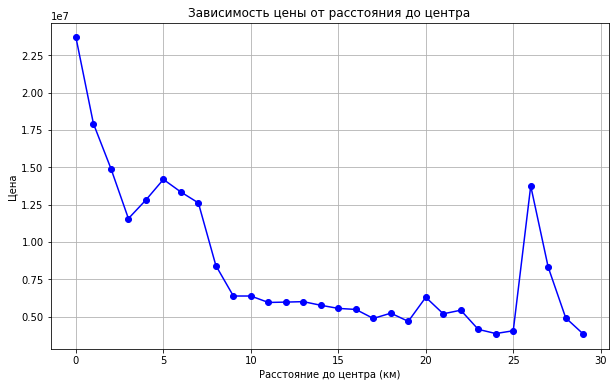

In [189]:
plt.figure(figsize=(10, 6))
plt.plot(data_for_schema.index, data_for_schema['last_price'], marker='o', linestyle='-', color='b', label='last_price vs center_distance_km')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Цена')
plt.title('Зависимость цены от расстояния до центра') 
plt.grid(True) 

### Напишите общий вывод

На представленных сводной таблице и графике мы можем заметить, что с приближением к центру стоимость объектов недвижимости растет, что в цело естественно. 

Примечательна аномалия на расстоянии 26-27 км от центра города, где цена относительно соседних расстояний возрастает от 3 до 5 раз. Это может быть связано с тем, что примерно на этом расстоянии расположен туристический район с дорогой недвижимостью (таунхаусы, клабхаусы и элитные жк у залива)

**Первичный анализ данных:**

Датасет содержит информацию о 23 699 объектах недвижимости с 22 параметрами.

Были обнаружены пропуски в данных, особенно в таких столбцах, как ceiling_height, living_area, kitchen_area, airports_nearest, city_centers_nearest, parks_nearest, ponds_nearest и days_exposition.

Явных дубликатов в данных не обнаружено.

Гистограммы показали наличие аномальных значений в некоторых столбцах, таких как ceiling_height и total_area.

**Предобработка данных:**

Названия столбцов были приведены к единому стандарту для удобства работы.

Типы данных были изменены для корректного анализа: last_price переведен в int, first_day_exposition — в datetime, floors_total — в int, is_apartment — в bool, balcony — в int.

Пропуски в данных были обработаны: для некоторых столбцов (например, balcony, parks_around_3000, ponds_around_3000) пропуски заполнены нулями, а для других (например, ceiling_height, living_area, kitchen_area) — медианными значениями.

Аномальные значения в столбцах ceiling_height и total_area были скорректированы или удалены.

Неявные дубликаты в столбце locality_name были устранены, а также добавлен новый столбец locality_type для группировки населенных пунктов.

**Добавление новых столбцов:**

Были добавлены новые столбцы, такие как price_for_m (цена за квадратный метр), exposition_day (день недели публикации), exposition_month (месяц публикации), exposition_year (год публикации), floor_category (тип этажа) и center_distance_km (расстояние до центра в километрах).

**Исследовательский анализ данных:**

Были изучены распределения ключевых параметров, таких как общая площадь, жилая площадь, площадь кухни, цена, количество комнат, высота потолков, тип этажа, количество этажей в доме, расстояние до центра города и до ближайшего парка.

Большинство параметров имеют распределение, близкое к нормальному или пуассоновскому, с наличием выбросов в хвостах распределений.

Среднее время продажи квартиры составляет около 156 дней, при этом 50% квартир продаются быстрее чем за 73 дня.

Были выявлены факторы, влияющие на стоимость квартиры: общая площадь, жилая площадь, площадь кухни, количество комнат, высота потолков, тип этажа и расстояние до центра города. Наибольшее влияние на цену оказывают общая площадь и жилая площадь.

Анализ стоимости квадратного метра:

Средняя цена квадратного метра в Санкт-Петербурге составляет около 114 000 рублей, что значительно выше, чем в других населенных пунктах, таких как Выборг (58 000 рублей за м²).

В топ-10 населенных пунктов с наибольшим количеством объектов недвижимости Санкт-Петербург занимает первое место по средней цене за квадратный метр.

Влияние расстояния до центра на стоимость квартиры:

Стоимость квартир в Санкт-Петербурге снижается с увеличением расстояния от центра города. Наиболее дорогие объекты расположены в пределах 0-5 км от центра.

На расстоянии 26-27 км от центра наблюдается аномальный рост цен, что может быть связано с наличием элитных жилых комплексов или туристических зон.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.